# Matplotlib 

### A simple example

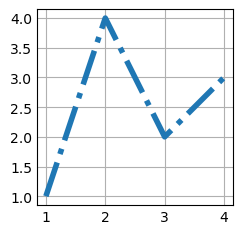

In [329]:
import matplotlib.pyplot as plt
import numpy as np         
fig, ax = plt.subplots()            
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]) 
plt.show()          

### Figure

<Figure size 200x200 with 0 Axes>

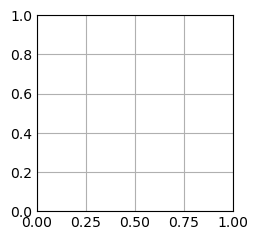

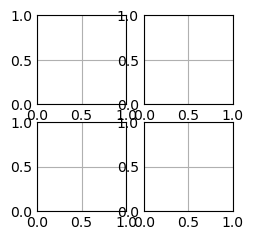

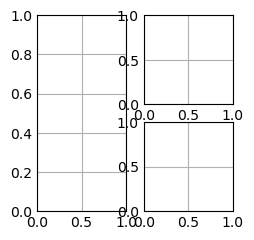

In [330]:
fig = plt.figure()            
fig, ax = plt.subplots()      
fig, axs = plt.subplots(2, 2) 
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

### Types of inputs to plotting functions

In [331]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Text(0, 0.5, 'entry b')

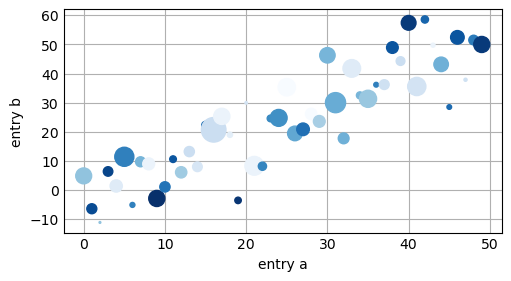

In [332]:
np.random.seed(19680801) 
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')


### Coding styles

### The explicit and the implicit interfaces

### OO-style

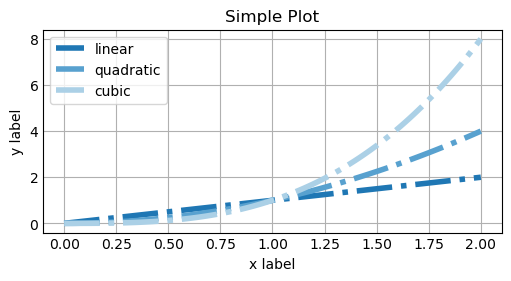

In [333]:
x = np.linspace(0, 2, 100)  

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear') 
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label') 
ax.set_ylabel('y label') 
ax.set_title("Simple Plot") 
ax.legend()  

### pyplot-style

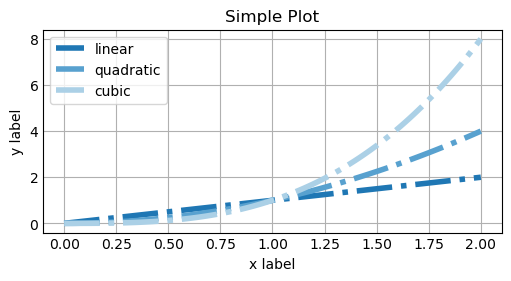

In [334]:
x = np.linspace(0, 2, 100) 

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear') 
plt.plot(x, x**2, label='quadratic') 
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

### Making a helper functions

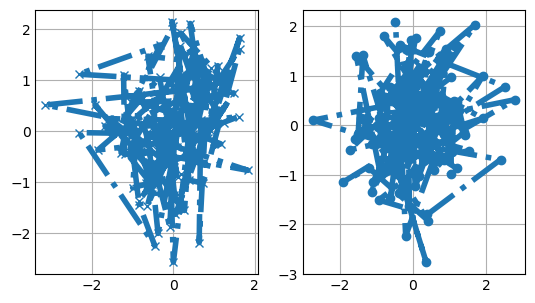

In [335]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

### Styling Artists

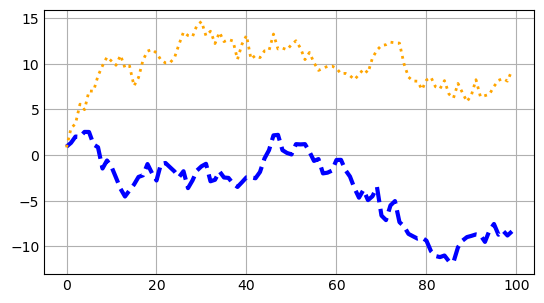

In [336]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

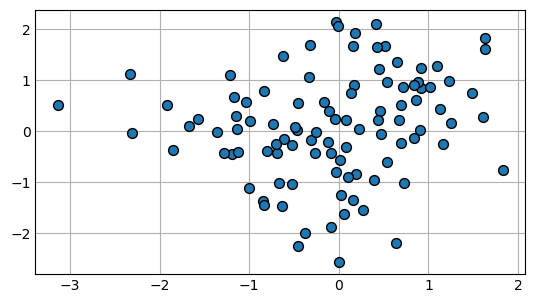

In [337]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

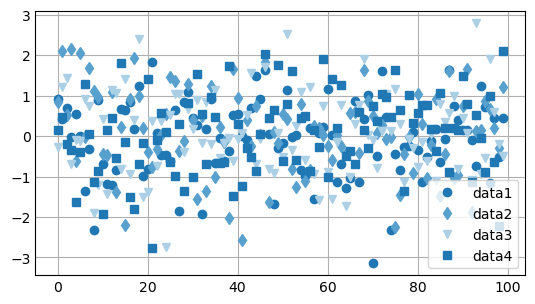

In [338]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

### Labelling plots

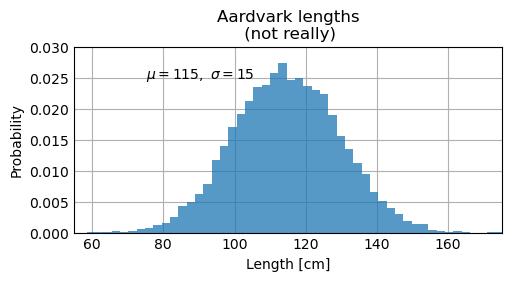

In [339]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Using mathematical expressions in text

In [340]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

### Annotations

(-2.0, 2.0)

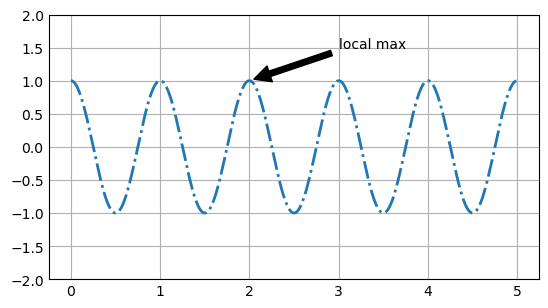

In [341]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

### Legends

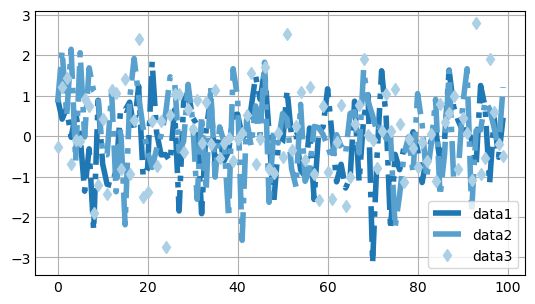

In [342]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

### Axis scales and ticks

### Scales

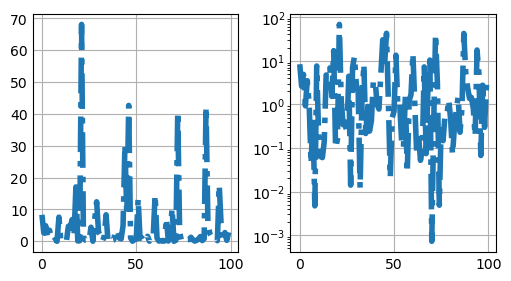

In [343]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters

Text(0.5, 1.0, 'Manual ticks')

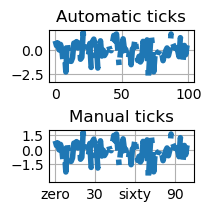

In [344]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

### Plotting dates and strings

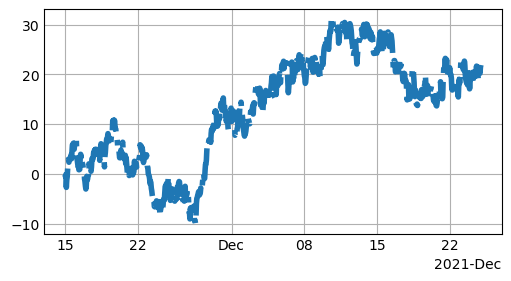

In [345]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

<BarContainer object of 4 artists>

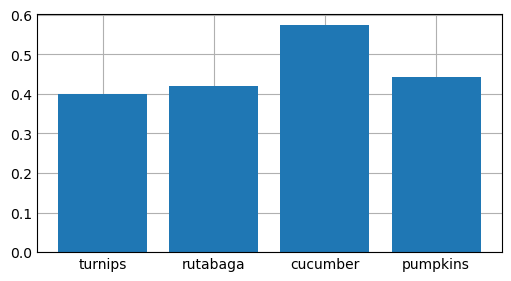

In [346]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

### Additional Axis objects

Text(0.5, 0, 'Angle [°]')

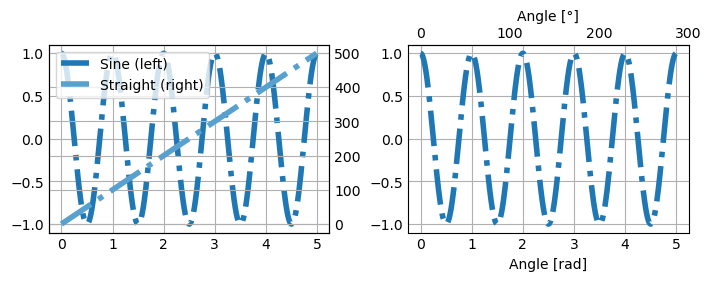

In [347]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

### Color mapped data

Text(0.5, 1.0, 'scatter()')

C:\Users\Ubaid-khan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


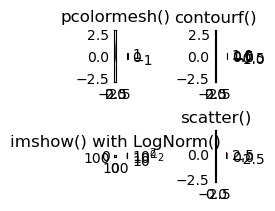

In [348]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### Working with multiple Figures and Axes

Text(0.5, 1.0, 'right')

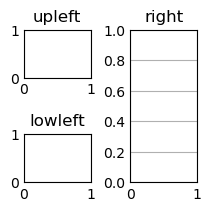

In [349]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

### Frequently Asked Questions

### Why do I have so many ticks, and/or why are they out of order?

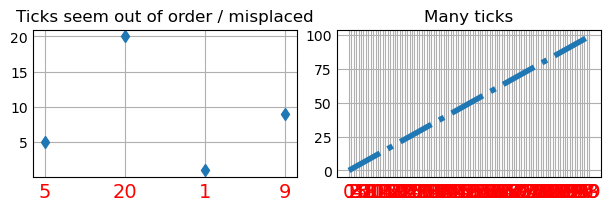

In [350]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(6, 2))

ax[0].set_title('Ticks seem out of order / misplaced')
x = ['5', '20', '1', '9']  # strings
y = [5, 20, 1, 9]
ax[0].plot(x, y, 'd')
ax[0].tick_params(axis='x', labelcolor='red', labelsize=14)

ax[1].set_title('Many ticks')
x = [str(xx) for xx in np.arange(100)]  # strings
y = np.arange(100)
ax[1].plot(x, y)
ax[1].tick_params(axis='x', labelcolor='red', labelsize=14)

### Check whether a figure is empty

In [351]:
def is_empty(figure):
    """
    Return whether the figure contains no Artists (other than the default
    background patch).
    """
    contained_artists = figure.get_children()
    return len(contained_artists) <= 1

### Find all objects in a figure of a certain type

In [352]:
def myfunc(x):
    return hasattr(x, 'set_color')

for o in fig.findobj(myfunc):
    o.set_color('blue')

In [353]:
import matplotlib.text as text
for o in fig.findobj(text.Text):
    o.set_fontstyle('italic')

### Generate images without having a window appear

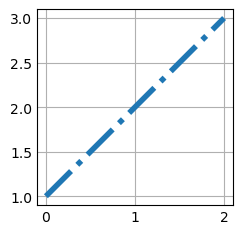

In [354]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3])
plt.savefig('myfig.png')

### Figures and backends

Text(0.0, 1.0, 'Axes')

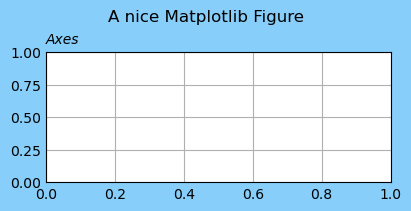

In [355]:
fig = plt.figure(figsize=(4, 2), facecolor='lightskyblue',
                 layout='constrained')
fig.suptitle('A nice Matplotlib Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

### Introduction to Figures

Text(0.0, 1.0, 'Axes')

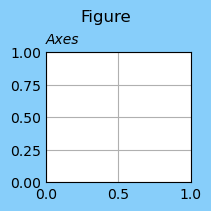

In [356]:
fig = plt.figure(figsize=(2, 2), facecolor='lightskyblue',
                 layout='constrained')
fig.suptitle('Figure')
ax = fig.add_subplot()
ax.set_title('Axes', loc='left', fontstyle='oblique', fontsize='medium')

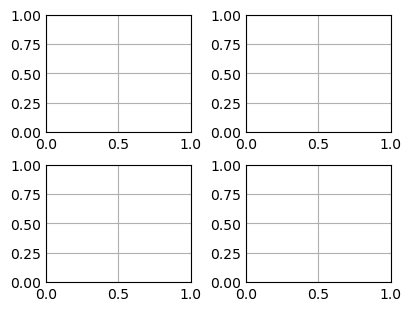

In [357]:
fig, axs = plt.subplots(2, 2, figsize=(4, 3), layout='constrained')

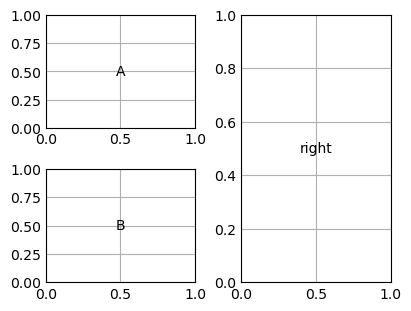

In [358]:
fig, axs = plt.subplot_mosaic([['A', 'right'], ['B', 'right']],
                              figsize=(4, 3), layout='constrained')
for ax_name, ax in axs.items():
    ax.text(0.5, 0.5, ax_name, ha='center', va='center')

Text(0.5, 0.98, 'Right subfigure')

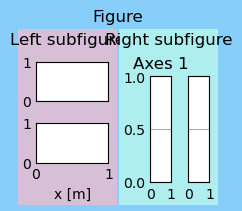

In [359]:
fig = plt.figure(layout='constrained', facecolor='lightskyblue')
fig.suptitle('Figure')
figL, figR = fig.subfigures(1, 2)
figL.set_facecolor('thistle')
axL = figL.subplots(2, 1, sharex=True)
axL[1].set_xlabel('x [m]')
figL.suptitle('Left subfigure')
figR.set_facecolor('paleturquoise')
axR = figR.subplots(1, 2, sharey=True)
axR[0].set_title('Axes 1')
figR.suptitle('Right subfigure')

### Introduction to Axes (or Subplots)

Text(0.5, 0.98, 'plt.subplots()')

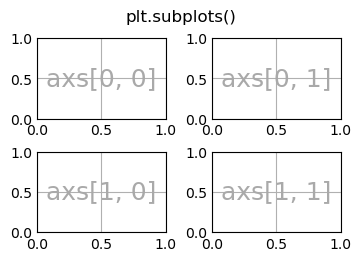

In [360]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            transform=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='darkgrey')
fig.suptitle('plt.subplots()')

### Axes plotting methods

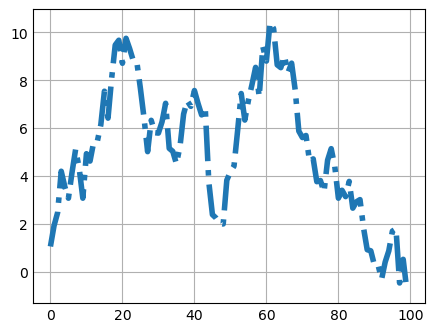

In [361]:
fig, ax = plt.subplots(figsize=(4, 3))
np.random.seed(19680801)
t = np.arange(100)
x = np.cumsum(np.random.randn(100))
lines = ax.plot(t, x)

### Axes labelling and annotation

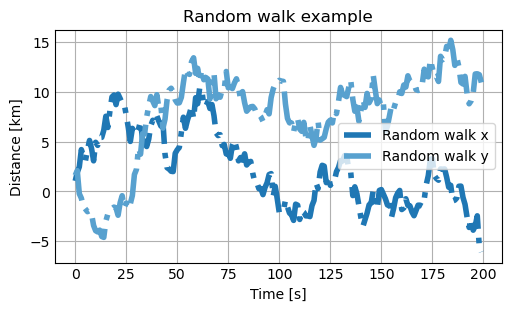

In [362]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
y = np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x, label='Random walk x')
linesy = ax.plot(t, y, label='Random walk y')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Distance [km]')
ax.set_title('Random walk example')
ax.legend()

### Axes limits, scales, and ticking

(20.0, 180.0)

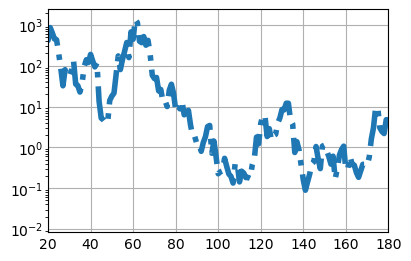

In [363]:
fig, ax = plt.subplots(figsize=(4, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = 2**np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x)
ax.set_yscale('log')
ax.set_xlim([20, 180])

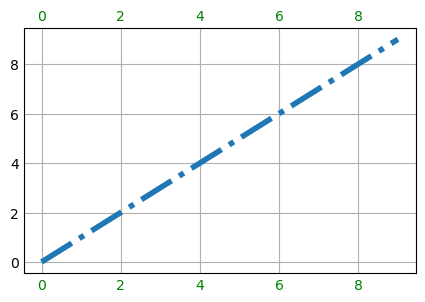

In [364]:
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(np.arange(10))
ax.tick_params(top=True, labeltop=True, color='red', axis='x',
               labelcolor='green')

### Axes layout

Text(0.5, 1.0, 'aspect=3')

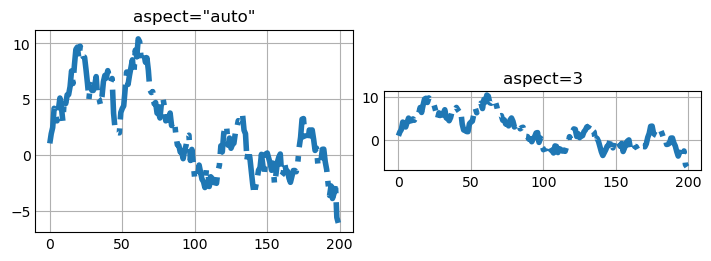

In [365]:
fig, axs = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
axs[0].plot(t, x)
axs[0].set_title('aspect="auto"')

axs[1].plot(t, x)
axs[1].set_aspect(3)
axs[1].set_title('aspect=3')

### Arranging multiple Axes in a Figure

### Adding single Axes at a time

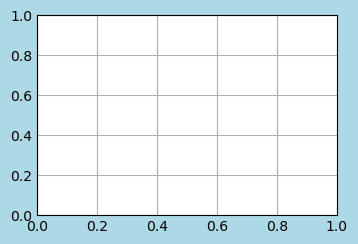

In [366]:
import matplotlib.pyplot as plt
import numpy as np

w, h = 4, 3
margin = 0.5
fig = plt.figure(figsize=(w, h), facecolor='lightblue')
ax = fig.add_axes([margin / w, margin / h, (w - 2 * margin) / w,
                      (h - 2 * margin) / h])

### High-level methods for making grids

### Basic 2x2 grid

Text(0.5, 0.98, 'plt.subplots()')

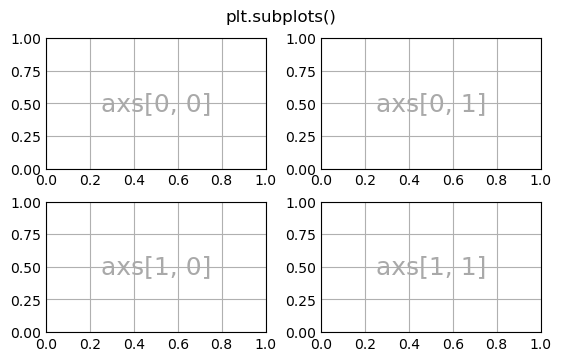

In [367]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

In [368]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'plt.subplot_mosaic()')

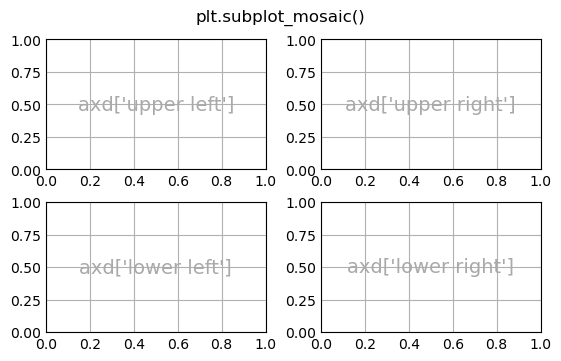

In [369]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Grids of fixed-aspect ratio Axes

Text(0.5, 0.98, 'Fixed aspect Axes')

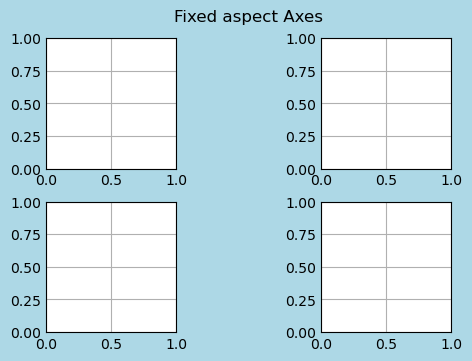

In [370]:
fig, axs = plt.subplots(2, 2, layout="constrained",
                        figsize=(5.5, 3.5), facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

Text(0.5, 0.98, 'Fixed aspect Axes: compressed')

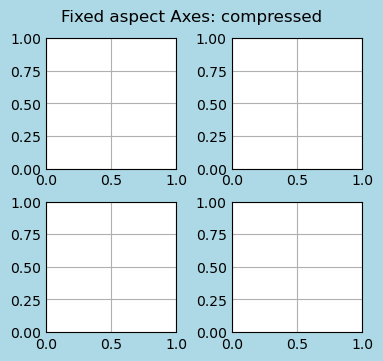

In [371]:
fig, axs = plt.subplots(2, 2, layout="compressed", figsize=(5.5, 3.5),
                        facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes: compressed')

### Axes spanning rows or columns in a grid

Text(0.5, 0.98, 'plt.subplot_mosaic()')

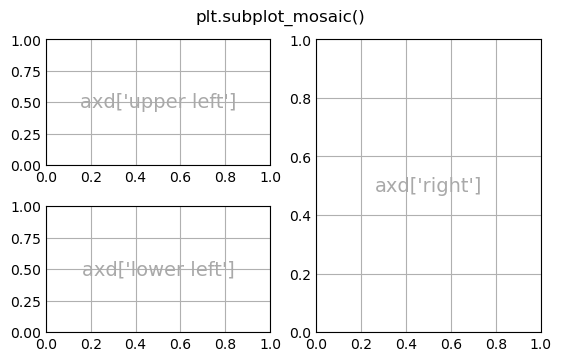

In [372]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Variable widths or heights in a grid

Text(0.5, 0.98, 'plt.subplot_mosaic()')

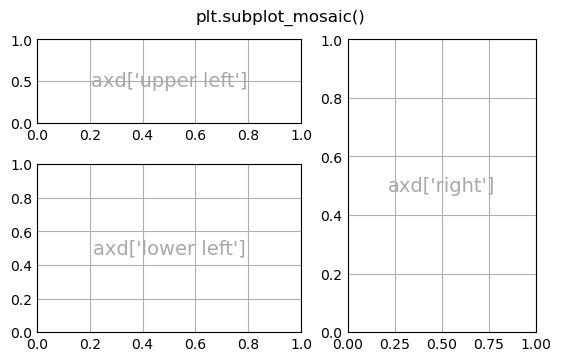

In [373]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

### Nested Axes layouts

Text(0.02, 0.5, 'ylabel for subfigs[1]')

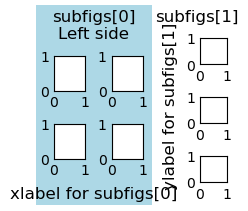

In [374]:
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('lightblue')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

C:\Users\Ubaid-khan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


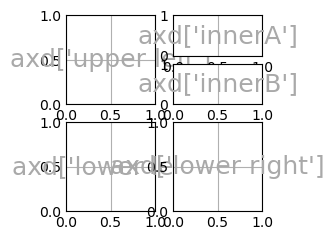

In [375]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

### Low-level and advanced grid methods

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

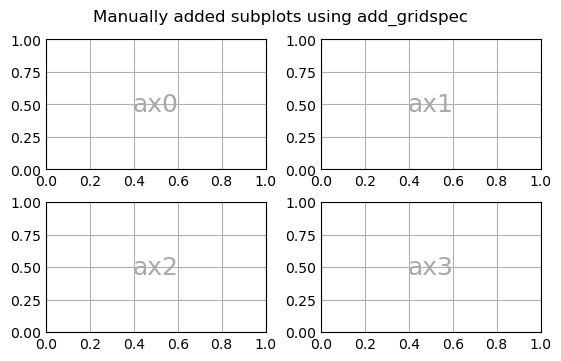

In [376]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

### Axes spanning rows or grids in a grid

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

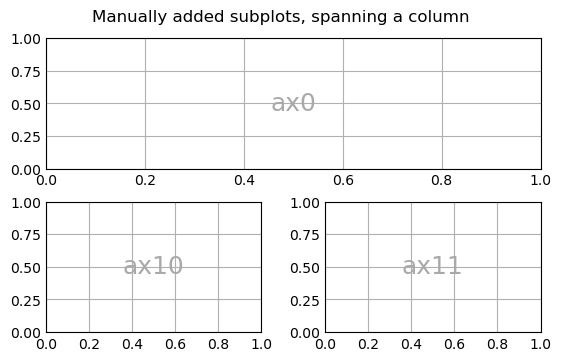

In [377]:
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

fig.suptitle('Manually added subplots, spanning a column')

### Manual adjustments to a GridSpec layout

Text(0.5, 0.98, 'Manual gridspec with right=0.75')

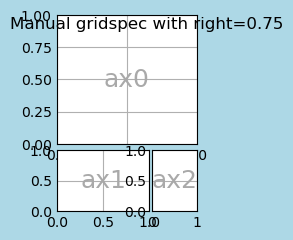

In [378]:
fig = plt.figure(layout=None, facecolor='lightblue')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

### Nested layouts with SubplotSpec

Text(0.5, 0.98, 'nested gridspecs')

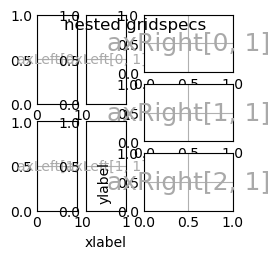

In [379]:
fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}]')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

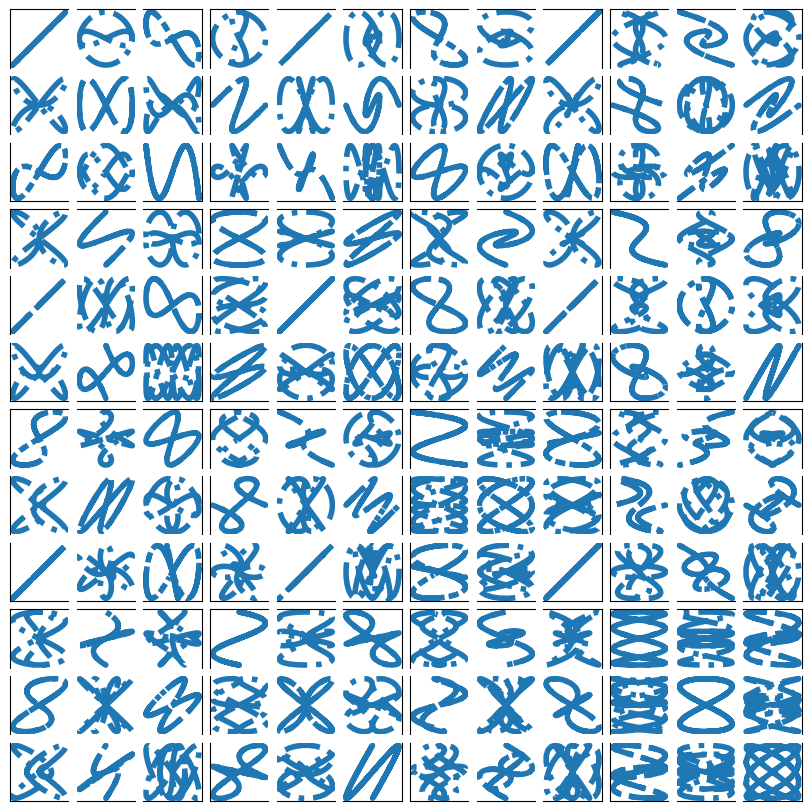

In [380]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8), layout='constrained')
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

for a in range(4):
    for b in range(4):
        # gridspec inside gridspec
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()  # Create all subplots for the inner grid.
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

# show only the outside spines
for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()

### Placing colorbars

### Automatic placement of colorbars

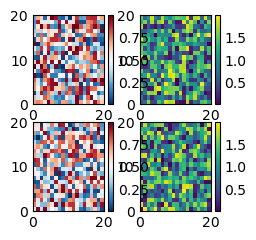

In [381]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

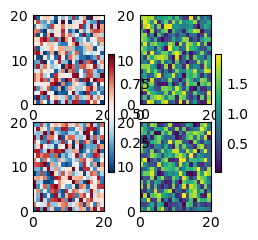

In [382]:
fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)


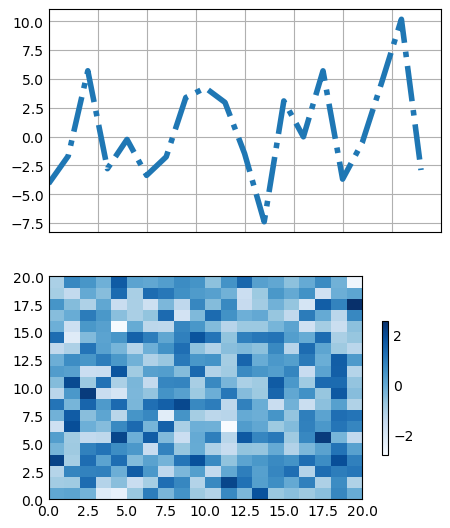

In [383]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)
X = np.random.randn(20, 20)
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

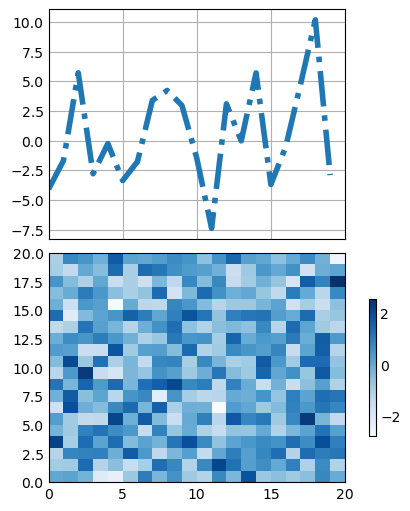

In [384]:
fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True, layout='constrained')
axs[0].plot(np.sum(X, axis=0))
pcm = axs[1].pcolormesh(X)
fig.colorbar(pcm, ax=axs[1], shrink=0.6)

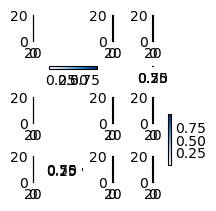

In [385]:
fig, axs = plt.subplots(3, 3, layout='constrained')
for ax in axs.flat:
    pcm = ax.pcolormesh(np.random.random((20, 20)))

fig.colorbar(pcm, ax=axs[0, :2], shrink=0.6, location='bottom')
fig.colorbar(pcm, ax=[axs[0, 2]], location='bottom')
fig.colorbar(pcm, ax=axs[1:, :], location='right', shrink=0.6)
fig.colorbar(pcm, ax=[axs[2, 1]], location='left')

### Adjusting the spacing between colorbars and parent Axes

Text(0.5, 0.98, "layout='constrained'")

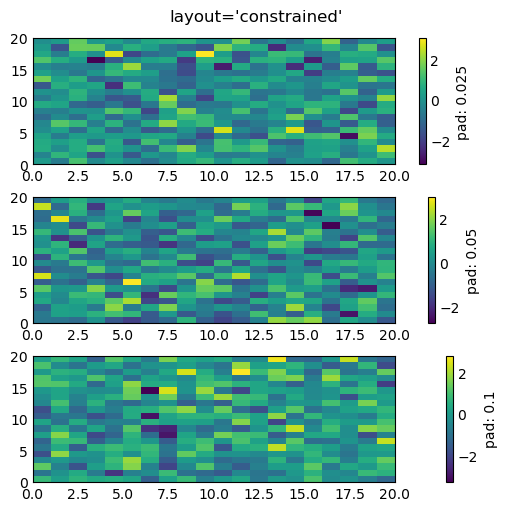

In [386]:
fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("layout='constrained'")

Text(0.5, 0.98, 'No layout manager')

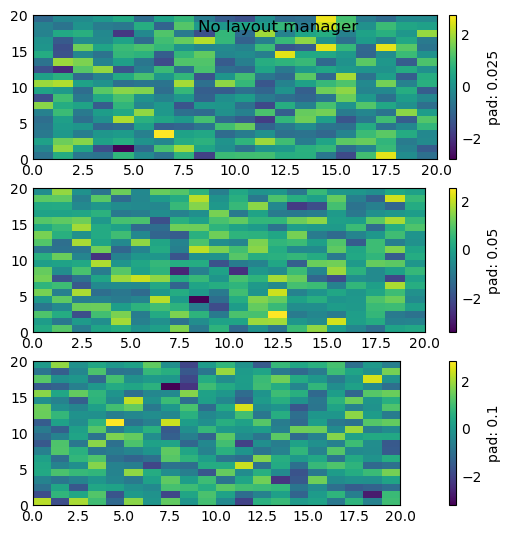

In [387]:
fig, axs = plt.subplots(3, 1, figsize=(5, 5))
for ax, pad in zip(axs, [0.025, 0.05, 0.1]):
    pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
    fig.colorbar(pcm, ax=ax, pad=pad, label=f'pad: {pad}')
fig.suptitle("No layout manager")

### Manual placement of colorbars

### Using inset_axes

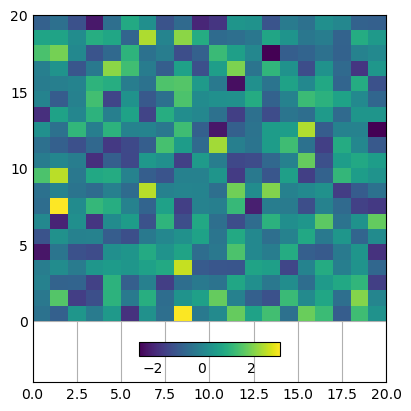

In [388]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')

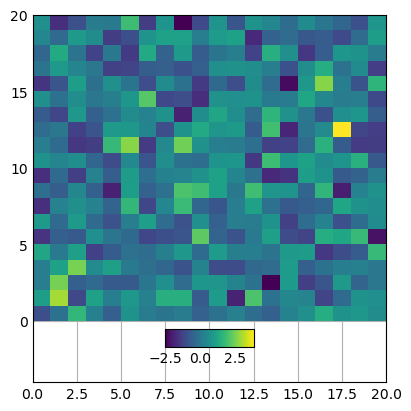

In [389]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([7.5, -1.7, 5, 1.2], transform=ax.transData)
fig.colorbar(pcm, cax=cax, orientation='horizontal')

### Colorbars attached to fixed-aspect-ratio Axes

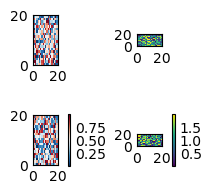

In [390]:
fig, axs = plt.subplots(2, 2,  layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            fig.colorbar(pcm, ax=ax, shrink=0.6)

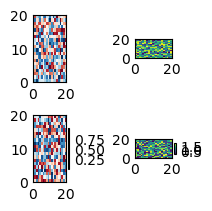

In [391]:
fig, axs = plt.subplots(2, 2, layout='constrained')
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1),
                            cmap=cmaps[col])
        if col == 0:
            ax.set_aspect(2)
        else:
            ax.set_aspect(1/2)
        if row == 1:
            cax = ax.inset_axes([1.04, 0.2, 0.05, 0.6])
            fig.colorbar(pcm, cax=cax)

### Autoscaling Axis

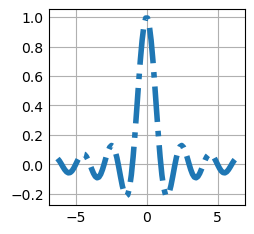

In [392]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)

### Margins

In [393]:
print(ax.margins())

(0.05, 0.05)


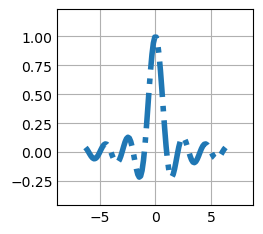

In [394]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)

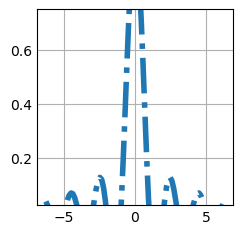

In [395]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(y=-0.2)

### Sticky edges

Text(0.5, 1.0, 'margins(0.2)')

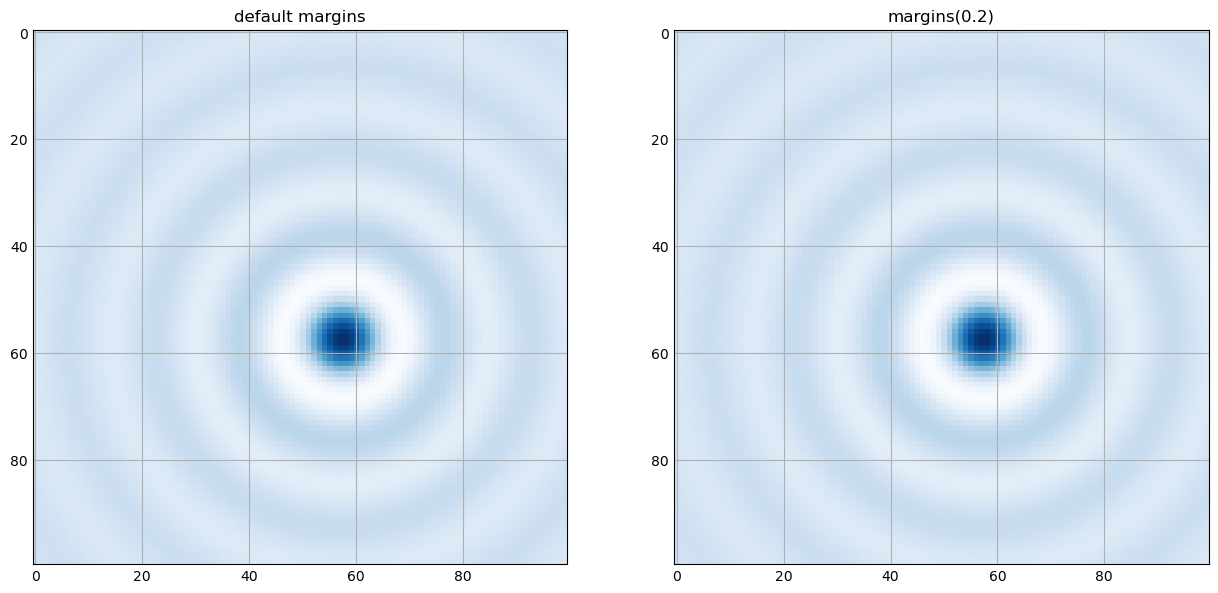

In [396]:
xx, yy = np.meshgrid(x, x)
zz = np.sinc(np.sqrt((xx - 1)**2 + (yy - 1)**2))

fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].imshow(zz)
ax[0].set_title("default margins")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].set_title("margins(0.2)")

Text(0.5, 1.0, 'default use_sticky_edges\nmargins(-0.2)')

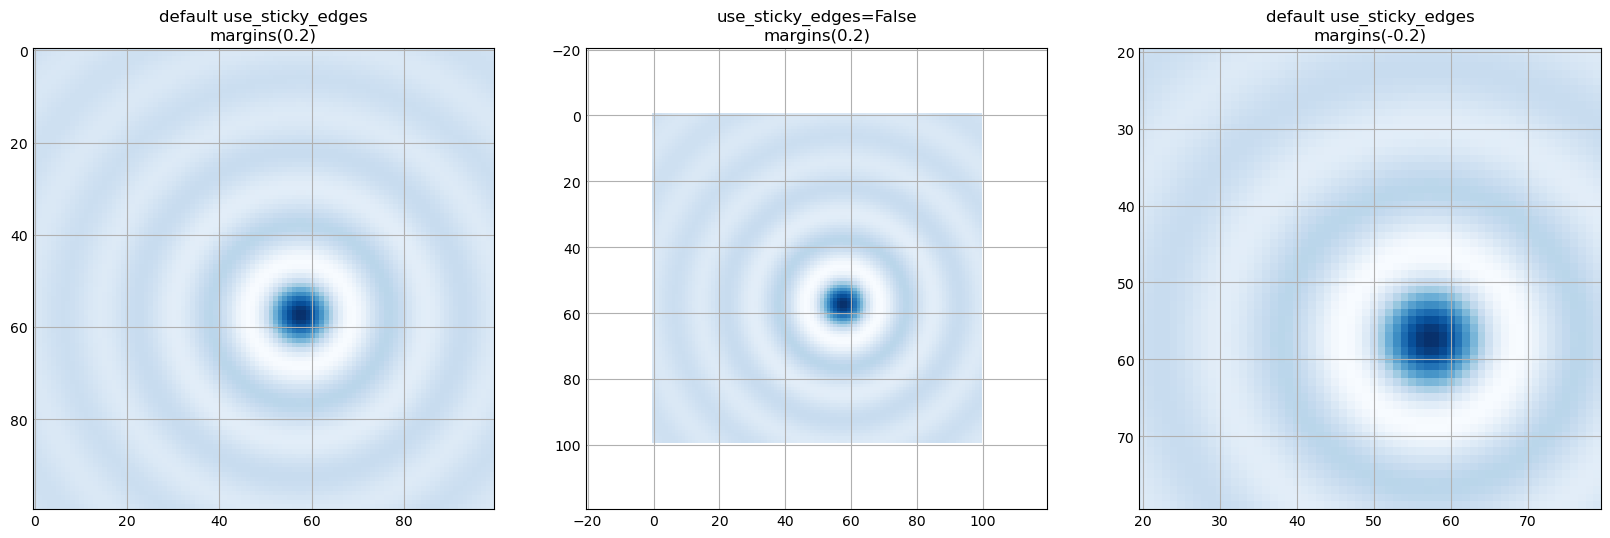

In [397]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 10))
ax[0].imshow(zz)
ax[0].margins(0.2)
ax[0].set_title("default use_sticky_edges\nmargins(0.2)")
ax[1].imshow(zz)
ax[1].margins(0.2)
ax[1].use_sticky_edges = False
ax[1].set_title("use_sticky_edges=False\nmargins(0.2)")
ax[2].imshow(zz)
ax[2].margins(-0.2)
ax[2].set_title("default use_sticky_edges\nmargins(-0.2)")

### Controlling autoscale

Text(0.5, 1.0, 'Two curves')

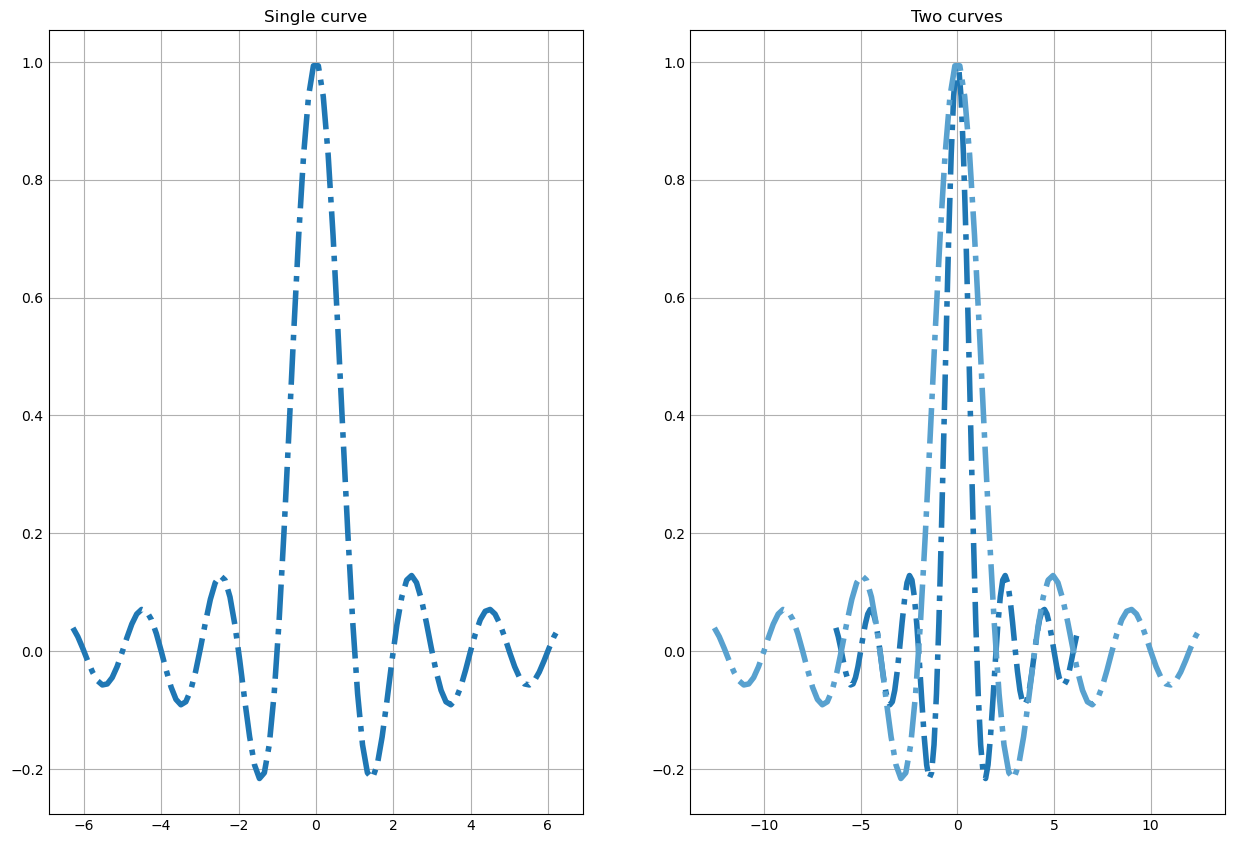

In [398]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_title("Single curve")
ax[1].plot(x, y)
ax[1].plot(x * 2.0, y)
ax[1].set_title("Two curves")

Text(0.5, 1.0, 'set_xlim(left=-1, right=1)\nautoscale()')

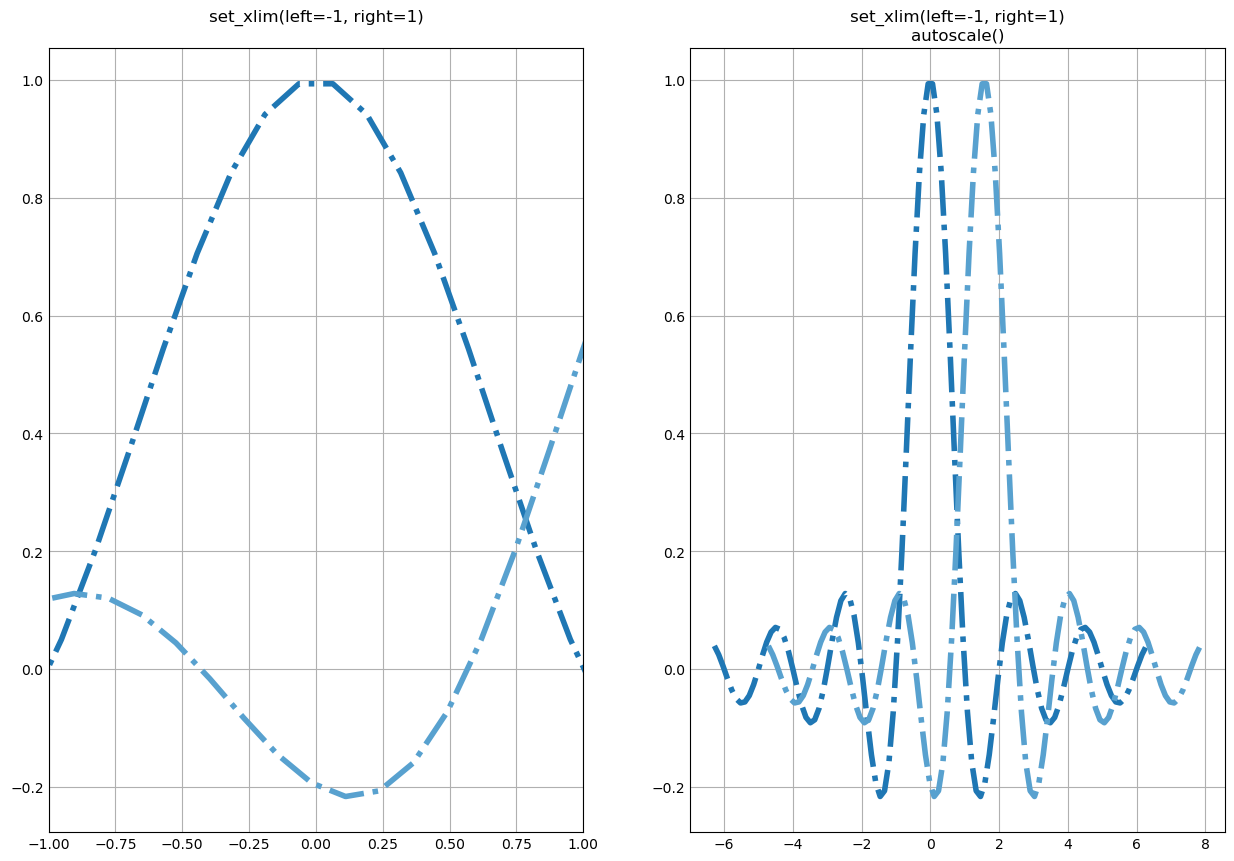

In [399]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))
ax[0].plot(x, y)
ax[0].set_xlim(left=-1, right=1)
ax[0].plot(x + np.pi * 0.5, y)
ax[0].set_title("set_xlim(left=-1, right=1)\n")
ax[1].plot(x, y)
ax[1].set_xlim(left=-1, right=1)
ax[1].plot(x + np.pi * 0.5, y)
ax[1].autoscale()
ax[1].set_title("set_xlim(left=-1, right=1)\nautoscale()")

In [400]:
print(ax[0].get_autoscale_on())  # False means disabled
print(ax[1].get_autoscale_on())  # True means enabled -> recalculated

False
True


(0, 0)


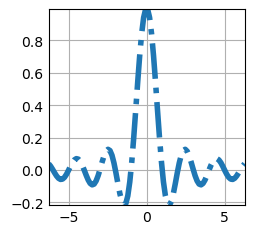

In [401]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2)
ax.autoscale(enable=None, axis="x", tight=True)

print(ax.margins())

### Working with collections

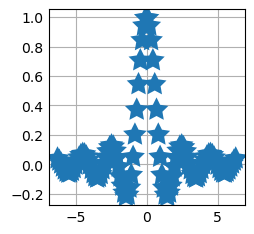

In [402]:
fig, ax = plt.subplots()
collection = mpl.collections.StarPolygonCollection(
    5, rotation=0, sizes=(250,),  # five point star, zero angle, size 250px
    offsets=np.column_stack([x, y]),  # Set the positions
    offset_transform=ax.transData,  # Propagate transformations of the Axes
)
ax.add_collection(collection)
ax.autoscale_view()

### Axis scales

Text(0, 0.5, 'log')

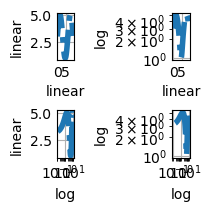

In [403]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.scale as mscale
from matplotlib.ticker import FixedLocator, NullFormatter

fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')

ax = axs['linear-log']
ax.plot(x, y)
ax.set_yscale('log')
ax.set_xlabel('linear')
ax.set_ylabel('log')

ax = axs['log-linear']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_xlabel('log')
ax.set_ylabel('linear')

ax = axs['log-log']
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('log')
ax.set_ylabel('log')

### loglog and semilogx/y

Text(0.5, 1.0, 'loglog(x, y)')

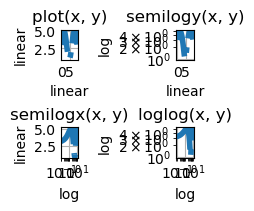

In [404]:
fig, axs = plt.subplot_mosaic([['linear', 'linear-log'],
                               ['log-linear', 'log-log']], layout='constrained')

x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

ax = axs['linear']
ax.plot(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('linear')
ax.set_title('plot(x, y)')

ax = axs['linear-log']
ax.semilogy(x, y)
ax.set_xlabel('linear')
ax.set_ylabel('log')
ax.set_title('semilogy(x, y)')

ax = axs['log-linear']
ax.semilogx(x, y)
ax.set_xlabel('log')
ax.set_ylabel('linear')
ax.set_title('semilogx(x, y)')

ax = axs['log-log']
ax.loglog(x, y)
ax.set_xlabel('log')
ax.set_ylabel('log')
ax.set_title('loglog(x, y)')

### Other built-in scales

In [405]:
print(mscale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


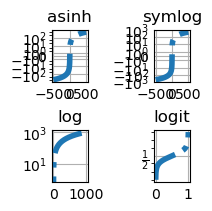

In [406]:
fig, axs = plt.subplot_mosaic([['asinh', 'symlog'],
                               ['log', 'logit']], layout='constrained')

x = np.arange(0, 1000)

for name, ax in axs.items():
    if name in ['asinh', 'symlog']:
        yy = x - np.mean(x)
    elif name in ['logit']:
        yy = (x-np.min(x))
        yy = yy / np.max(np.abs(yy))
    else:
        yy = x

    ax.plot(yy, yy)
    ax.set_yscale(name)
    ax.set_title(name)

### Optional arguments for scales

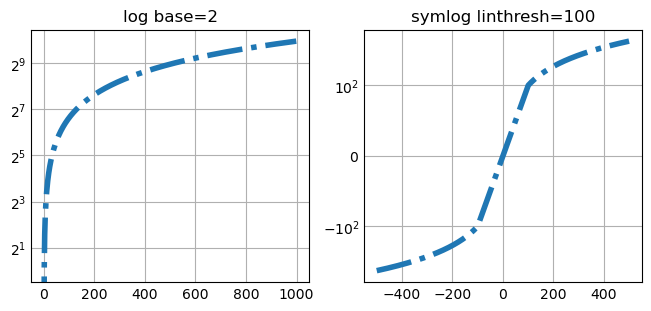

In [407]:
fig, axs = plt.subplot_mosaic([['log', 'symlog']], layout='constrained',
                              figsize=(6.4, 3))

for name, ax in axs.items():
    if name in ['log']:
        ax.plot(x, x)
        ax.set_yscale('log', base=2)
        ax.set_title('log base=2')
    else:
        ax.plot(x - np.mean(x), x - np.mean(x))
        ax.set_yscale('symlog', linthresh=100)
        ax.set_title('symlog linthresh=100')

### Arbitrary function scales

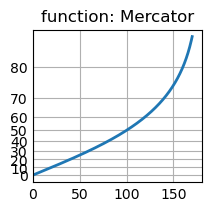

In [408]:
# Function Mercator transform
def forward(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.log(np.abs(np.tan(a) + 1.0 / np.cos(a))))


def inverse(a):
    a = np.deg2rad(a)
    return np.rad2deg(np.arctan(np.sinh(a)))


t = np.arange(0, 170.0, 0.1)
s = t / 2.

fig, ax = plt.subplots(layout='constrained')
ax.plot(t, s, '-', lw=2)

ax.set_yscale('function', functions=(forward, inverse))
ax.set_title('function: Mercator')
ax.grid(True)
ax.set_xlim([0, 180])
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 90, 10)))

### What is a "scale"?

linear
log


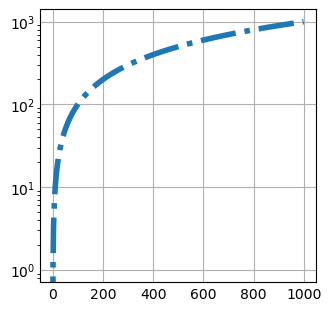

In [409]:
fig, ax = plt.subplots(layout='constrained',
                              figsize=(3.2, 3))
ax.semilogy(x, x)

print(ax.xaxis.get_scale())
print(ax.yaxis.get_scale())

In [410]:
print(ax.yaxis.get_transform())

LogTransform(base=10, nonpositive='clip')


In [411]:
print('X axis')
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_major_formatter())

print('Y axis')
print(ax.yaxis.get_major_locator())
print(ax.yaxis.get_major_formatter())

X axis
Y axis


### Axis ticks

### Manual location and formats

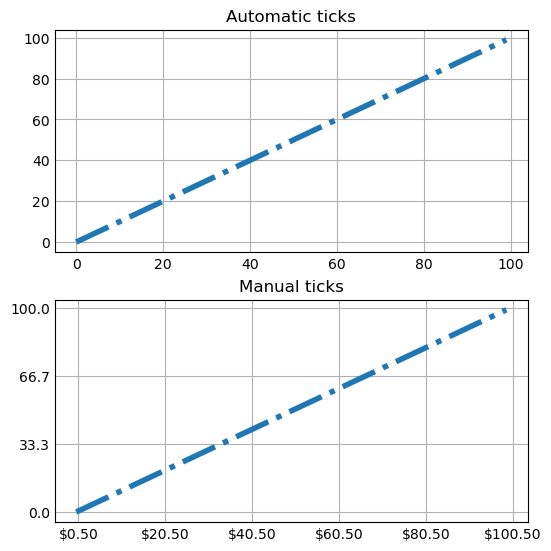

In [412]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker


fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        xticks = np.arange(0.50, 101, 20)
        xlabels = [f'\\${x:1.2f}' for x in xticks]
        ax.set_xticks(xticks, labels=xlabels)
    else:
        ax.set_title('Automatic ticks')

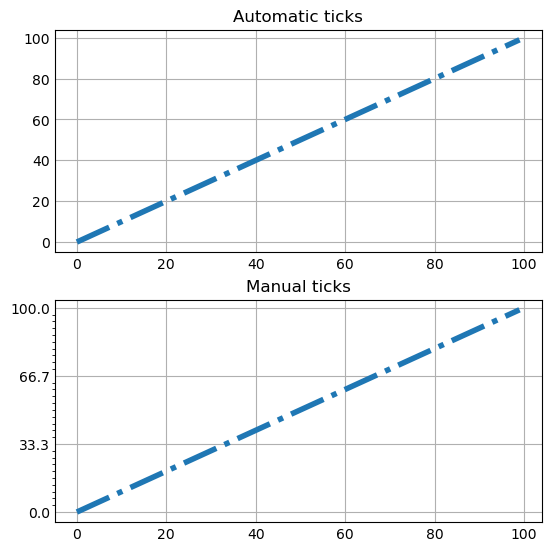

In [413]:
fig, axs = plt.subplots(2, 1, figsize=(5.4, 5.4), layout='constrained')
x = np.arange(100)
for nn, ax in enumerate(axs):
    ax.plot(x, x)
    if nn == 1:
        ax.set_title('Manual ticks')
        ax.set_yticks(np.arange(0, 100.1, 100/3))
        ax.set_yticks(np.arange(0, 100.1, 100/30), minor=True)
    else:
        ax.set_title('Automatic ticks')

### Locators and Formatters

C:\Users\Ubaid-khan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


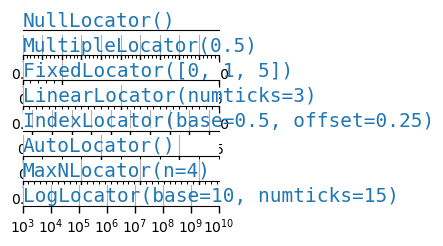

In [414]:
def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig, axs = plt.subplots(8, 1, layout='constrained')

# Null Locator
setup(axs[0], title="NullLocator()")
axs[0].xaxis.set_major_locator(ticker.NullLocator())
axs[0].xaxis.set_minor_locator(ticker.NullLocator())

# Multiple Locator
setup(axs[1], title="MultipleLocator(0.5)")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

# Fixed Locator
setup(axs[2], title="FixedLocator([0, 1, 5])")
axs[2].xaxis.set_major_locator(ticker.FixedLocator([0, 1, 5]))
axs[2].xaxis.set_minor_locator(ticker.FixedLocator(np.linspace(0.2, 0.8, 4)))

# Linear Locator
setup(axs[3], title="LinearLocator(numticks=3)")
axs[3].xaxis.set_major_locator(ticker.LinearLocator(3))
axs[3].xaxis.set_minor_locator(ticker.LinearLocator(31))

# Index Locator
setup(axs[4], title="IndexLocator(base=0.5, offset=0.25)")
axs[4].plot(range(0, 5), [0]*5, color='white')
axs[4].xaxis.set_major_locator(ticker.IndexLocator(base=0.5, offset=0.25))

# Auto Locator
setup(axs[5], title="AutoLocator()")
axs[5].xaxis.set_major_locator(ticker.AutoLocator())
axs[5].xaxis.set_minor_locator(ticker.AutoMinorLocator())

# MaxN Locator
setup(axs[6], title="MaxNLocator(n=4)")
axs[6].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[6].xaxis.set_minor_locator(ticker.MaxNLocator(40))

# Log Locator
setup(axs[7], title="LogLocator(base=10, numticks=15)")
axs[7].set_xlim(10**3, 10**10)
axs[7].set_xscale('log')
axs[7].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
plt.show()

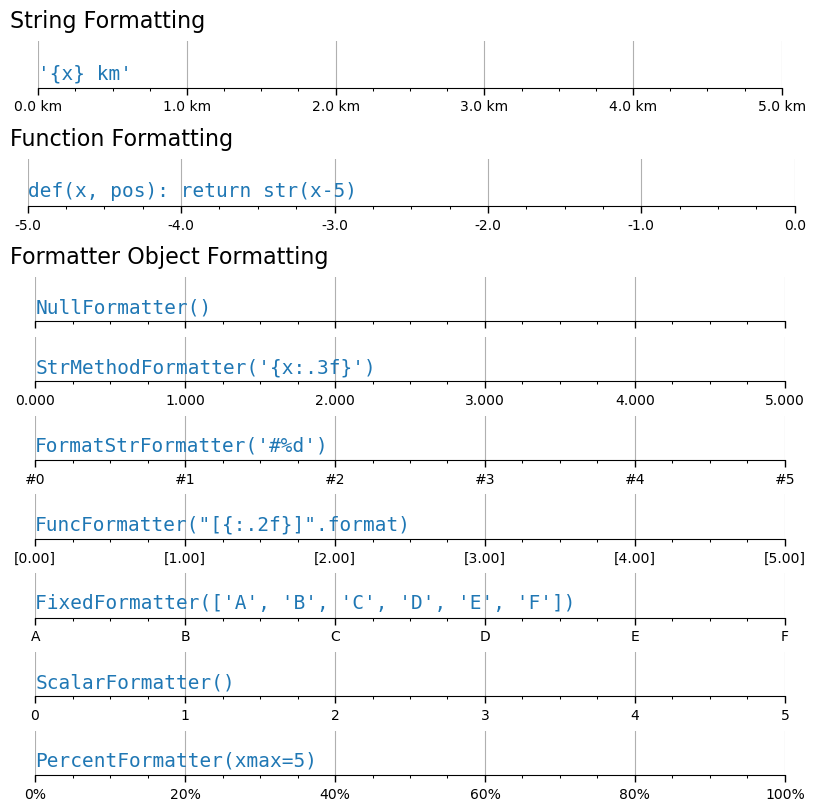

In [415]:
def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines[['left', 'right', 'top']].set_visible(False)

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.2, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')


fig = plt.figure(figsize=(8, 8), layout='constrained')
fig0, fig1, fig2 = fig.subfigures(3, height_ratios=[1.5, 1.5, 7.5])

fig0.suptitle('String Formatting', fontsize=16, x=0, ha='left')
ax0 = fig0.subplots()

setup(ax0, title="'{x} km'")
ax0.xaxis.set_major_formatter('{x} km')

fig1.suptitle('Function Formatting', fontsize=16, x=0, ha='left')
ax1 = fig1.subplots()

setup(ax1, title="def(x, pos): return str(x-5)")
ax1.xaxis.set_major_formatter(lambda x, pos: str(x-5))

fig2.suptitle('Formatter Object Formatting', fontsize=16, x=0, ha='left')
axs2 = fig2.subplots(7, 1)

setup(axs2[0], title="NullFormatter()")
axs2[0].xaxis.set_major_formatter(ticker.NullFormatter())

setup(axs2[1], title="StrMethodFormatter('{x:.3f}')")
axs2[1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.3f}"))

setup(axs2[2], title="FormatStrFormatter('#%d')")
axs2[2].xaxis.set_major_formatter(ticker.FormatStrFormatter("#%d"))


def fmt_two_digits(x, pos):
    return f'[{x:.2f}]'


setup(axs2[3], title='FuncFormatter("[{:.2f}]".format)')
axs2[3].xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))

setup(axs2[4], title="FixedFormatter(['A', 'B', 'C', 'D', 'E', 'F'])")
# FixedFormatter should only be used together with FixedLocator.
# Otherwise, one cannot be sure where the labels will end up.
positions = [0, 1, 2, 3, 4, 5]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
axs2[4].xaxis.set_major_locator(ticker.FixedLocator(positions))
axs2[4].xaxis.set_major_formatter(ticker.FixedFormatter(labels))

setup(axs2[5], title="ScalarFormatter()")
axs2[5].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))

setup(axs2[6], title="PercentFormatter(xmax=5)")
axs2[6].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))

### Styling ticks (tick parameters)

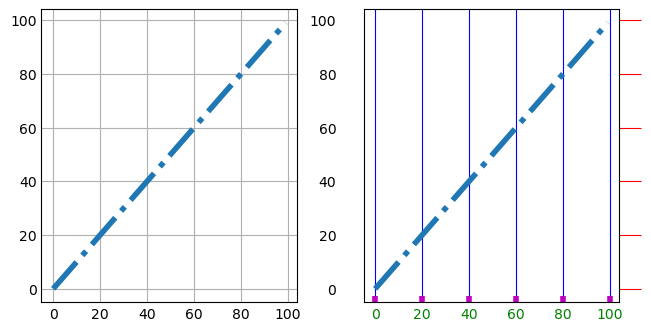

In [416]:
fig, axs = plt.subplots(1, 2, figsize=(6.4, 3.2), layout='constrained')

for nn, ax in enumerate(axs):
    ax.plot(np.arange(100))
    if nn == 1:
        ax.grid('on')
        ax.tick_params(right=True, left=False, axis='y', color='r', length=16,
                       grid_color='none')
        ax.tick_params(axis='x', color='m', length=4, direction='in', width=4,
                       labelcolor='g', grid_color='b')

### Plotting dates and strings

### Date conversion

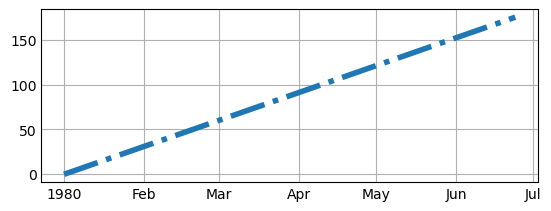

In [417]:
import matplotlib.dates as mdates
import matplotlib.units as munits



fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)

Text(0, 0, ' Float x=0')

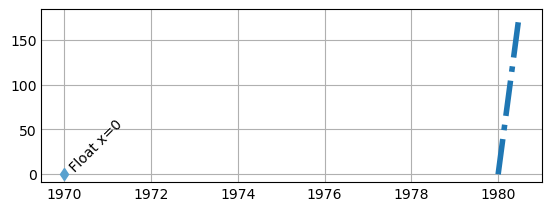

In [418]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
# 0 gets labeled as 1970-01-01
ax.plot(0, 0, 'd')
ax.text(0, 0, ' Float x=0', rotation=45)

Text(0.5, 0, '1980')

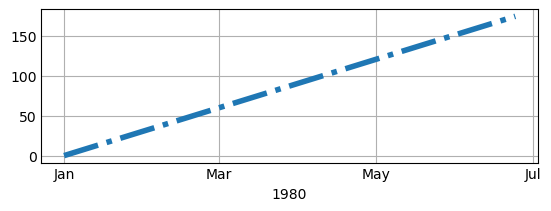

In [419]:
fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=np.arange(1, 13, 2)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlabel('1980')

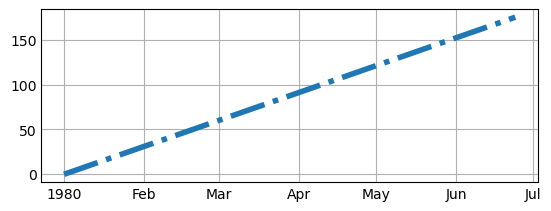

In [420]:
plt.rcParams['date.converter'] = 'concise'

fig, ax = plt.subplots(figsize=(5.4, 2), layout='constrained')
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)

(3683, 3743)

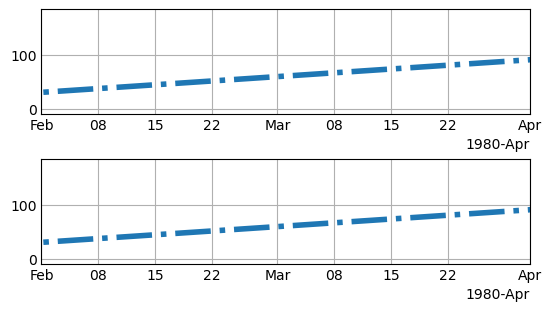

In [421]:
fig, axs = plt.subplots(2, 1, figsize=(5.4, 3), layout='constrained')
for ax in axs.flat:
    time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
    x = np.arange(len(time))
    ax.plot(time, x)

# set xlim using datetime64:
axs[0].set_xlim(np.datetime64('1980-02-01'), np.datetime64('1980-04-01'))

# set xlim using floats:
# Note can get from mdates.date2num(np.datetime64('1980-02-01'))
axs[1].set_xlim(3683, 3683+60)

### String conversion: categorical plots

Text(0.5, 0.98, 'Categorical Plotting')

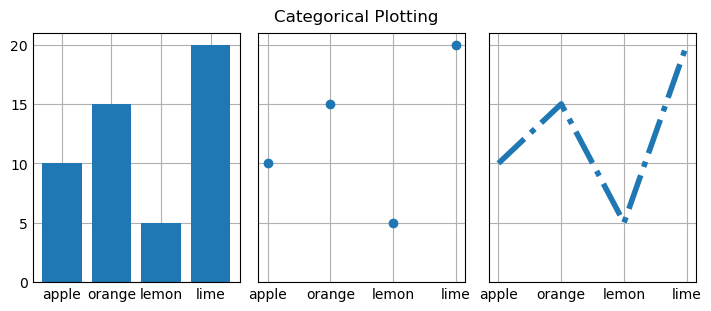

In [422]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(7, 3), sharey=True, layout='constrained')
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

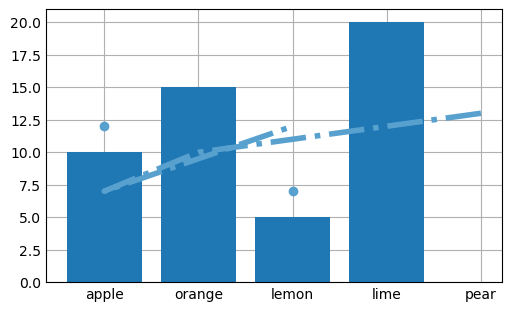

In [423]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.bar(names, values)

# plot in a different order:
ax.scatter(['lemon', 'apple'], [7, 12])

# add a new category, "pear", and put the other categories in a different order:
ax.plot(['pear', 'orange', 'apple', 'lemon'], [13, 10, 7, 12], color='C1')

Text(2.5, 3, 'Float x=2.5')

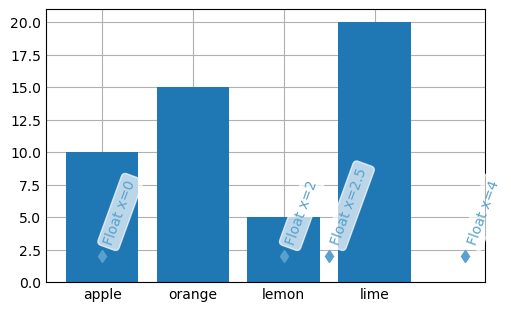

In [424]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.bar(names, values)
# arguments for styling the labels below:
args = {'rotation': 70, 'color': 'C1',
        'bbox': {'color': 'white', 'alpha': .7, 'boxstyle': 'round'}}


# 0 gets labeled as "apple"
ax.plot(0, 2, 'd', color='C1')
ax.text(0, 3, 'Float x=0', **args)

# 2 gets labeled as "lemon"
ax.plot(2, 2, 'd', color='C1')
ax.text(2, 3, 'Float x=2', **args)

# 4 doesn't get a label
ax.plot(4, 2, 'd', color='C1')
ax.text(4, 3, 'Float x=4', **args)

# 2.5 doesn't get a label
ax.plot(2.5, 2, 'd', color='C1')
ax.text(2.5, 3, 'Float x=2.5', **args)

Text(0.5, 0, 'limits set with floats')

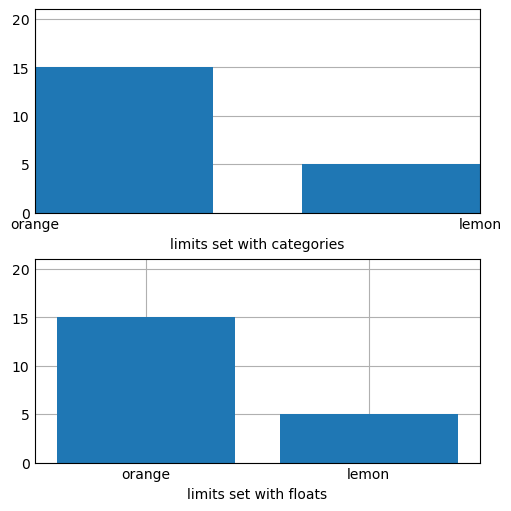

In [425]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5), layout='constrained')
ax = axs[0]
ax.bar(names, values)
ax.set_xlim('orange', 'lemon')
ax.set_xlabel('limits set with categories')
ax = axs[1]
ax.bar(names, values)
ax.set_xlim(0.5, 2.5)
ax.set_xlabel('limits set with floats')

Text(0.5, 0, 'x is list of strings')

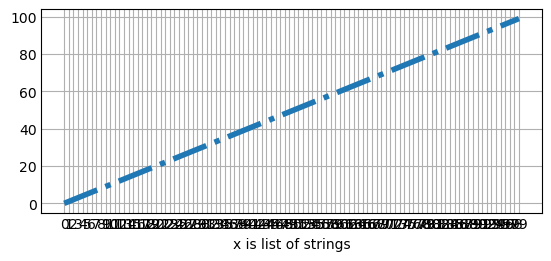

In [426]:
fig, ax = plt.subplots(figsize=(5.4, 2.5), layout='constrained')
x = [str(xx) for xx in np.arange(100)]  # list of strings
ax.plot(x, np.arange(100))
ax.set_xlabel('x is list of strings')

Text(0.5, 0, 'x is array of floats')

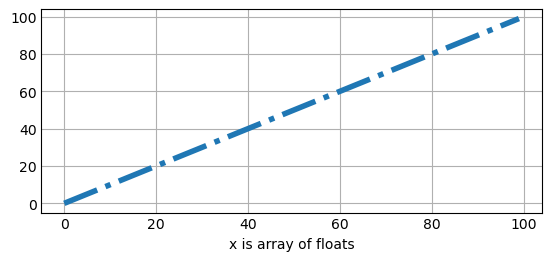

In [427]:
fig, ax = plt.subplots(figsize=(5.4, 2.5), layout='constrained')
x = np.asarray(x, dtype='float')  # array of float.
ax.plot(x, np.arange(100))
ax.set_xlabel('x is array of floats')

### Determine converter, formatter, and locator on an axis

Text(0.5, 0, 'Converter: <matplotlib.category.StrCategoryConverter object at 0x00000204238CB110>\n Locator: <matplotlib.category.StrCategoryLocator object at 0x000002044904F450>\nFormatter: <matplotlib.category.StrCategoryFormatter object at 0x0000020449747410>\n')

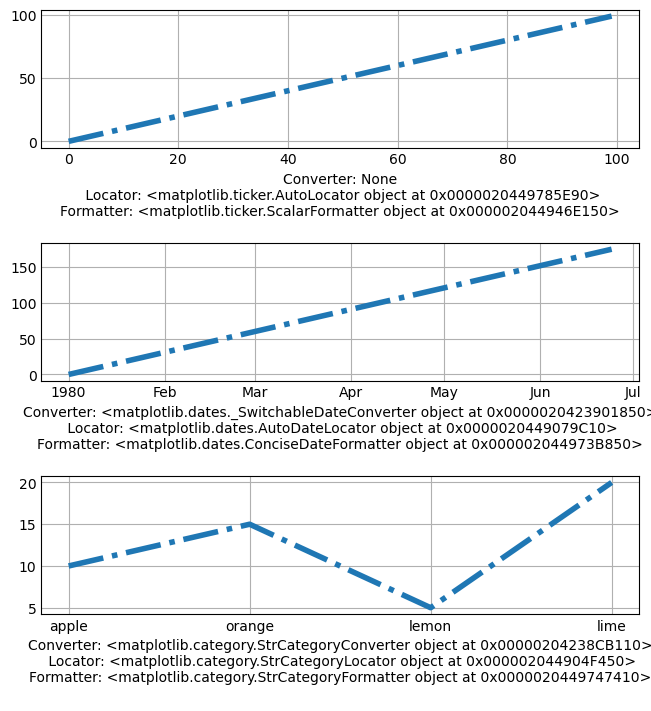

In [428]:
fig, axs = plt.subplots(3, 1, figsize=(6.4, 7), layout='constrained')
x = np.arange(100)
ax = axs[0]
ax.plot(x, x)
label = f'Converter: {ax.xaxis.converter}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

ax = axs[1]
time = np.arange('1980-01-01', '1980-06-25', dtype='datetime64[D]')
x = np.arange(len(time))
ax.plot(time, x)
label = f'Converter: {ax.xaxis.converter}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

ax = axs[2]
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
ax.plot(names, values)
label = f'Converter: {ax.xaxis.converter}\n '
label += f'Locator: {ax.xaxis.get_major_locator()}\n'
label += f'Formatter: {ax.xaxis.get_major_formatter()}\n'
ax.set_xlabel(label)

### More about "unit" support

In [429]:
for k, v in munits.registry.items():
    print(f"type: {k};\n    converter: {type(v)}")

type: <class 'decimal.Decimal'>;
    converter: <class 'matplotlib.units.DecimalConverter'>
type: <class 'str'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'numpy.str_'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'bytes'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'numpy.bytes_'>;
    converter: <class 'matplotlib.category.StrCategoryConverter'>
type: <class 'numpy.datetime64'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>
type: <class 'datetime.date'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>
type: <class 'datetime.datetime'>;
    converter: <class 'matplotlib.dates._SwitchableDateConverter'>


### Legend guide

### Controlling the legend entries

In [430]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

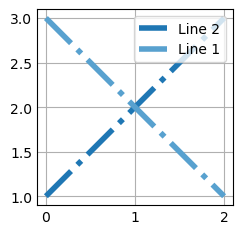

In [431]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend(handles=[line_up, line_down])

### Renaming legend entries

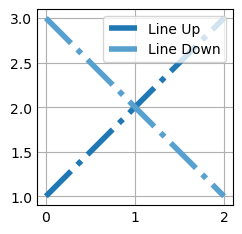

In [432]:
fig, ax = plt.subplots()
line_up, = ax.plot([1, 2, 3], label='Line 2')
line_down, = ax.plot([3, 2, 1], label='Line 1')
ax.legend([line_up, line_down], ['Line Up', 'Line Down'])

### Creating artists specifically for adding to the legend (aka. Proxy artists)

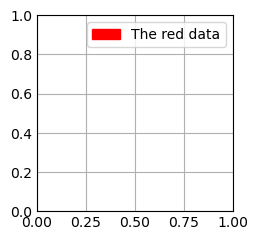

In [433]:
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

fig, ax = plt.subplots()
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])

plt.show()

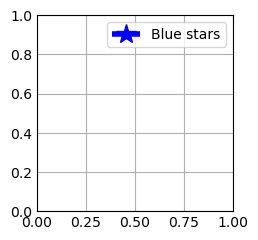

In [434]:
import matplotlib.lines as mlines

fig, ax = plt.subplots()
blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
ax.legend(handles=[blue_line])

plt.show()

### Legend location

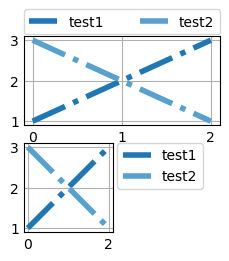

In [435]:
fig, ax_dict = plt.subplot_mosaic([['top', 'top'], ['bottom', 'BLANK']],
                                  empty_sentinel="BLANK")
ax_dict['top'].plot([1, 2, 3], label="test1")
ax_dict['top'].plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
ax_dict['top'].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)

ax_dict['bottom'].plot([1, 2, 3], label="test1")
ax_dict['bottom'].plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
ax_dict['bottom'].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

### Figure legends

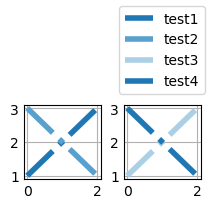

In [436]:
fig, axs = plt.subplot_mosaic([['left', 'right']], layout='constrained')

axs['left'].plot([1, 2, 3], label="test1")
axs['left'].plot([3, 2, 1], label="test2")

axs['right'].plot([1, 2, 3], 'C2', label="test3")
axs['right'].plot([3, 2, 1], 'C3', label="test4")
# Place a legend to the right of this smaller subplot.
fig.legend(loc='outside upper right')

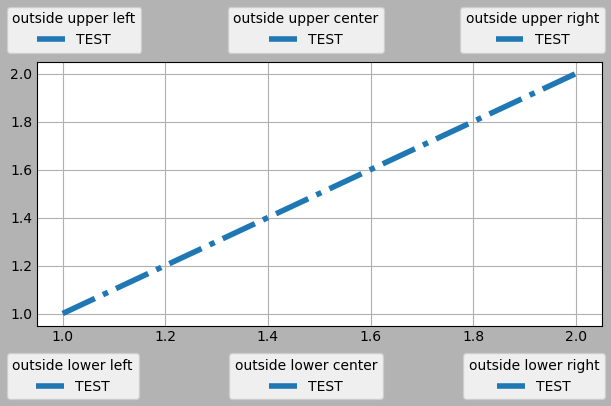

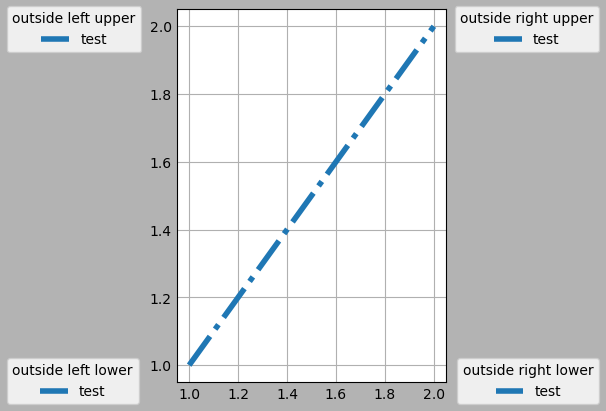

In [437]:
ucl = ['upper', 'center', 'lower']
lcr = ['left', 'center', 'right']
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')

ax.plot([1, 2], [1, 2], label='TEST')
# Place a legend to the right of this smaller subplot.
for loc in [
        'outside upper left',
        'outside upper center',
        'outside upper right',
        'outside lower left',
        'outside lower center',
        'outside lower right']:
    fig.legend(loc=loc, title=loc)

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', facecolor='0.7')
ax.plot([1, 2], [1, 2], label='test')

for loc in [
        'outside left upper',
        'outside right upper',
        'outside left lower',
        'outside right lower']:
    fig.legend(loc=loc, title=loc)

### Multiple legends on the same Axes

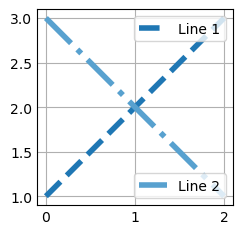

In [438]:
fig, ax = plt.subplots()
line1, = ax.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = ax.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = ax.legend(handles=[line1], loc='upper right')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=[line2], loc='lower right')

plt.show()

### Legend handlers

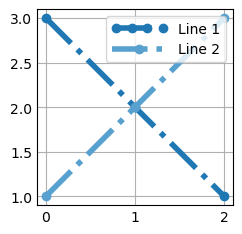

In [439]:
from matplotlib.legend_handler import HandlerLine2D

fig, ax = plt.subplots()
line1, = ax.plot([3, 2, 1], marker='o', label='Line 1')
line2, = ax.plot([1, 2, 3], marker='o', label='Line 2')

ax.legend(handler_map={line1: HandlerLine2D(numpoints=4)}, handlelength=4)

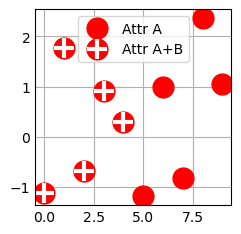

In [440]:
from numpy.random import randn

z = randn(10)

fig, ax = plt.subplots()
red_dot, = ax.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = ax.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

ax.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

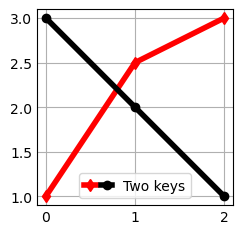

In [441]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

fig, ax = plt.subplots()
p1, = ax.plot([1, 2.5, 3], 'r-d')
p2, = ax.plot([3, 2, 1], 'k-o')

l = ax.legend([(p1, p2)], ['Two keys'], numpoints=1,
              handler_map={tuple: HandlerTuple(ndivide=None)})


### Implementing a custom legend handler

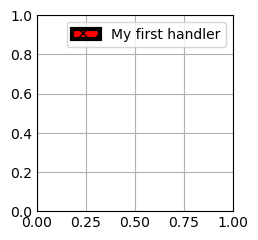

In [442]:
import matplotlib.patches as mpatches


class AnyObject:
    pass


class AnyObjectHandler:
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

fig, ax = plt.subplots()

ax.legend([AnyObject()], ['My first handler'],
          handler_map={AnyObject: AnyObjectHandler()})

In [443]:
from matplotlib.legend import Legend
Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

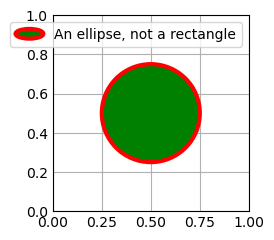

In [444]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)

fig, ax = plt.subplots()

ax.add_patch(c)
ax.legend([c], ["An ellipse, not a rectangle"],
          handler_map={mpatches.Circle: HandlerEllipse()})

### Complex and semantic figure composition (subplot_mosaic)

In [445]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

C:\Users\Ubaid-khan\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


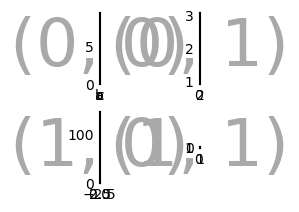

In [446]:
np.random.seed(19680801)
hist_data = np.random.randn(1_500)


fig = plt.figure(layout="constrained")
ax_array = fig.subplots(2, 2, squeeze=False)

ax_array[0, 0].bar(["a", "b", "c"], [5, 7, 9])
ax_array[0, 1].plot([1, 2, 3])
ax_array[1, 0].hist(hist_data, bins="auto")
ax_array[1, 1].imshow([[1, 2], [2, 1]])

identify_axes(
    {(j, k): a for j, r in enumerate(ax_array) for k, a in enumerate(r)},
)

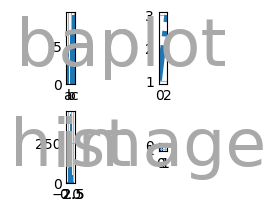

In [447]:
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["bar", "plot"],
        ["hist", "image"],
    ],
)
ax_dict["bar"].bar(["a", "b", "c"], [5, 7, 9])
ax_dict["plot"].plot([1, 2, 3])
ax_dict["hist"].hist(hist_data)
ax_dict["image"].imshow([[1, 2], [2, 1]])
identify_axes(ax_dict)

### String short-hand

In [448]:
mosaic = """
    AB
    CD
    """

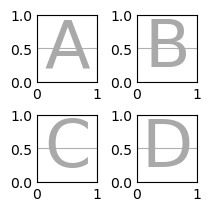

In [449]:
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(mosaic)
identify_axes(ax_dict)

In [450]:
mosaic = "AB;CD"

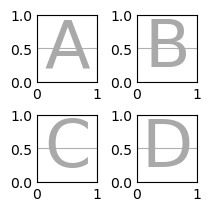

In [451]:
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(mosaic)
identify_axes(ax_dict)

### Axes spanning multiple rows/columns

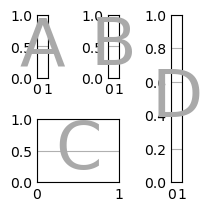

In [452]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABD
    CCD
    """
)
identify_axes(axd)

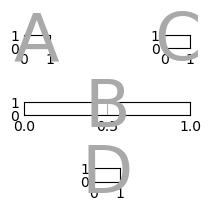

In [453]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    A.C
    BBB
    .D.
    """
)
identify_axes(axd)

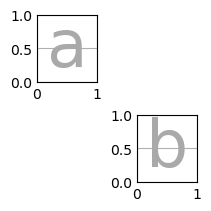

In [454]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    aX
    Xb
    """,
    empty_sentinel="X",
)
identify_axes(axd)

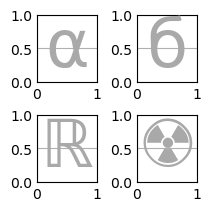

In [455]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """αб
       ℝ☢"""
)
identify_axes(axd)

### Controlling mosaic creation

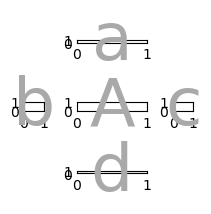

In [456]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    .a.
    bAc
    .d.
    """,
    # set the height ratios between the rows
    height_ratios=[1, 3.5, 1],
    # set the width ratios between the columns
    width_ratios=[1, 3.5, 1],
)
identify_axes(axd)

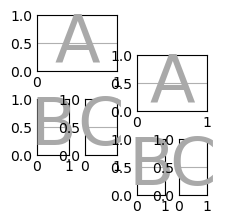

In [457]:
mosaic = """AA
            BC"""
fig = plt.figure()
axd = fig.subplot_mosaic(
    mosaic,
    gridspec_kw={
        "bottom": 0.25,
        "top": 0.95,
        "left": 0.1,
        "right": 0.5,
        "wspace": 0.5,
        "hspace": 0.5,
    },
)
identify_axes(axd)

axd = fig.subplot_mosaic(
    mosaic,
    gridspec_kw={
        "bottom": 0.05,
        "top": 0.75,
        "left": 0.6,
        "right": 0.95,
        "wspace": 0.5,
        "hspace": 0.5,
    },
)
identify_axes(axd)

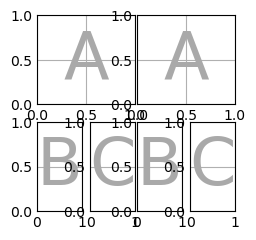

In [458]:
mosaic = """AA
            BC"""
fig = plt.figure(layout="constrained")
left, right = fig.subfigures(nrows=1, ncols=2)
axd = left.subplot_mosaic(mosaic)
identify_axes(axd)

axd = right.subplot_mosaic(mosaic)
identify_axes(axd)

### Controlling subplot creation

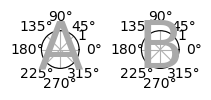

In [459]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    "AB", subplot_kw={"projection": "polar"}
)
identify_axes(axd)

### Per-Axes subplot keyword arguments

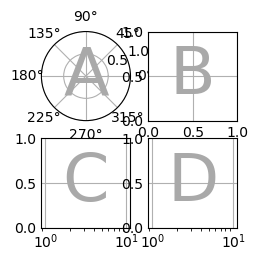

In [460]:
fig, axd = plt.subplot_mosaic(
    "AB;CD",
    per_subplot_kw={
        "A": {"projection": "polar"},
        ("C", "D"): {"xscale": "log"}
    },
)
identify_axes(axd)

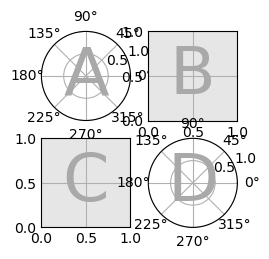

In [461]:
fig, axd = plt.subplot_mosaic(
    "AB;CD",
    per_subplot_kw={
        "AD": {"projection": "polar"},
        "BC": {"facecolor": ".9"}
    },
)
identify_axes(axd)

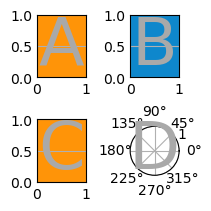

In [462]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    "AB;CD",
    subplot_kw={"facecolor": "xkcd:tangerine"},
    per_subplot_kw={
        "B": {"facecolor": "xkcd:water blue"},
        "D": {"projection": "polar", "facecolor": "w"},
    }
)
identify_axes(axd)

### Nested list input

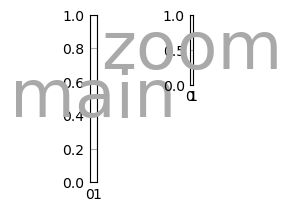

In [463]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    [
        ["main", "zoom"],
        ["main", "BLANK"],
    ],
    empty_sentinel="BLANK",
    width_ratios=[2, 1],
)
identify_axes(axd)

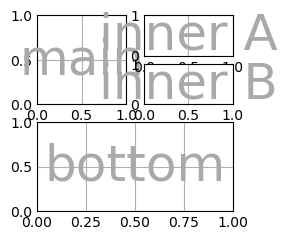

In [464]:
inner = [
    ["inner A"],
    ["inner B"],
]

outer_nested_mosaic = [
    ["main", inner],
    ["bottom", "bottom"],
]
axd = plt.figure(layout="constrained").subplot_mosaic(
    outer_nested_mosaic, empty_sentinel=None
)
identify_axes(axd, fontsize=36)

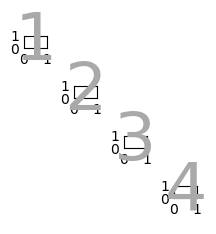

In [465]:
mosaic = np.zeros((4, 4), dtype=int)
for j in range(4):
    mosaic[j, j] = j + 1
axd = plt.figure(layout="constrained").subplot_mosaic(
    mosaic,
    empty_sentinel=0,
)
identify_axes(axd)

### Constrained layout guide

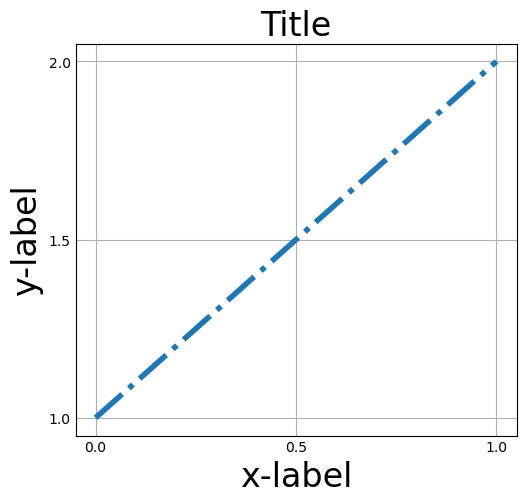

In [466]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.
plt.rcParams['figure.max_open_warning'] = 50


def example_plot(ax, fontsize=12, hide_labels=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if hide_labels:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    else:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)

fig, ax = plt.subplots(layout=None)
example_plot(ax, fontsize=24)

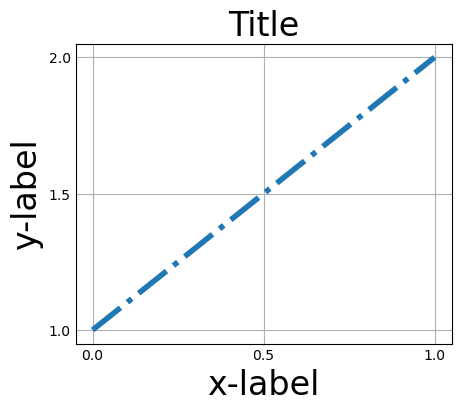

In [467]:
fig, ax = plt.subplots(layout="constrained")
example_plot(ax, fontsize=24)

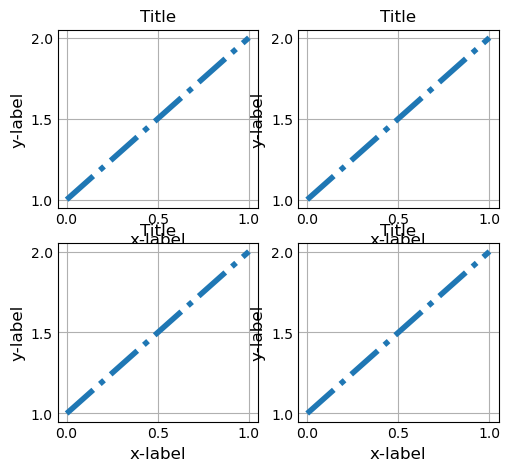

In [468]:
fig, axs = plt.subplots(2, 2, layout=None)
for ax in axs.flat:
    example_plot(ax)

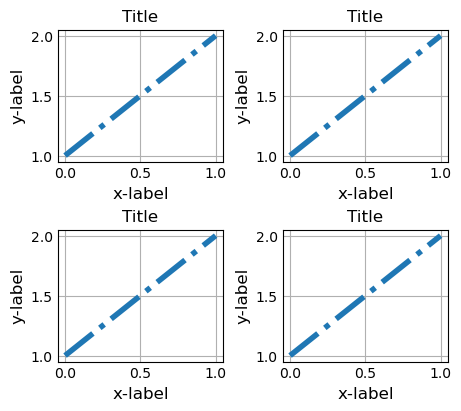

In [469]:
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax)

### Colorbars

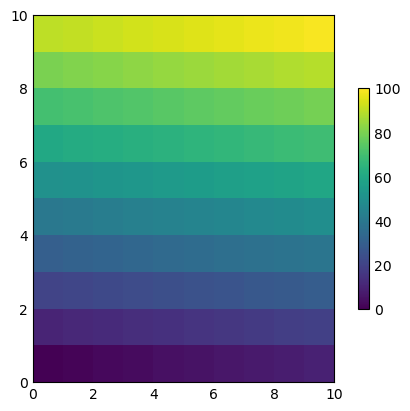

In [470]:
arr = np.arange(100).reshape((10, 10))
norm = mcolors.Normalize(vmin=0., vmax=100.)
# see note above: this makes all pcolormesh calls consistent:
pc_kwargs = {'rasterized': True, 'cmap': 'viridis', 'norm': norm}
fig, ax = plt.subplots(figsize=(4, 4), layout="constrained")
im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=ax, shrink=0.6)

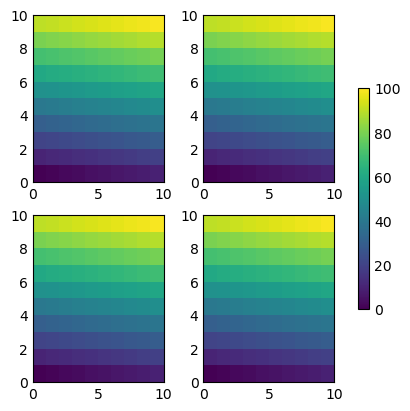

In [471]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), layout="constrained")
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)

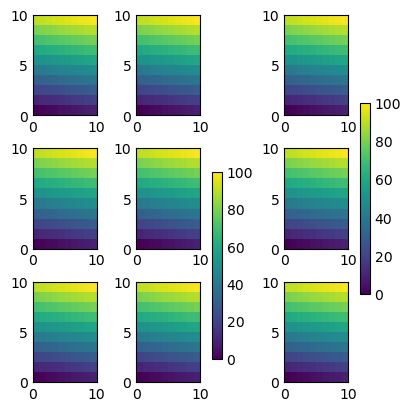

In [472]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4), layout="constrained")
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs[1:, 1], shrink=0.8)
fig.colorbar(im, ax=axs[:, -1], shrink=0.6)

### Suptitle

Text(0.5, 0.98, 'Big Suptitle')

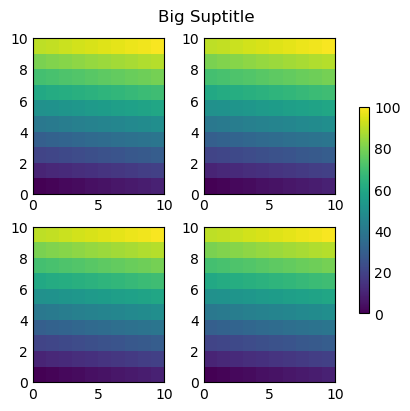

In [473]:
fig, axs = plt.subplots(2, 2, figsize=(4, 4), layout="constrained")
for ax in axs.flat:
    im = ax.pcolormesh(arr, **pc_kwargs)
fig.colorbar(im, ax=axs, shrink=0.6)
fig.suptitle('Big Suptitle')

### Legends

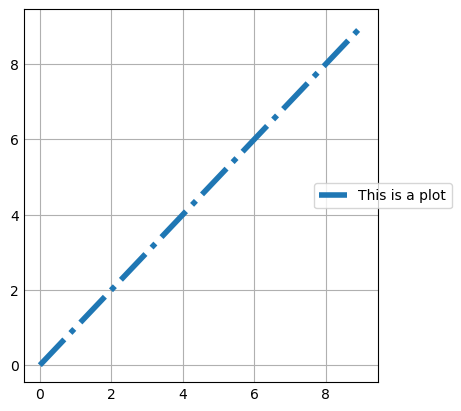

In [474]:
fig, ax = plt.subplots(layout="constrained")
ax.plot(np.arange(10), label='This is a plot')
ax.legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

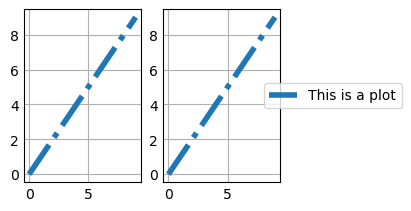

In [475]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), layout="constrained")
axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))

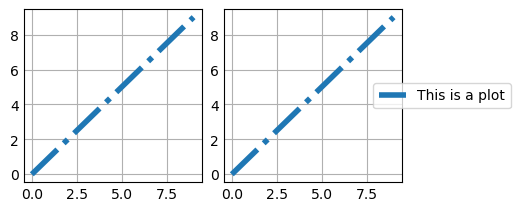

In [476]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), layout="constrained")

axs[0].plot(np.arange(10))
axs[1].plot(np.arange(10), label='This is a plot')
leg = axs[1].legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
leg.set_in_layout(False)

fig.canvas.draw()

leg.set_in_layout(True)

fig.set_layout_engine('none')
try:
    fig.savefig('../../../doc/_static/constrained_layout_1b.png',
                bbox_inches='tight', dpi=100)
except FileNotFoundError:
    pass

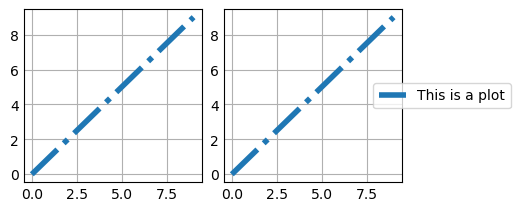

In [477]:
fig, axs = plt.subplots(1, 2, figsize=(4, 2), layout="constrained")
axs[0].plot(np.arange(10))
lines = axs[1].plot(np.arange(10), label='This is a plot')
labels = [l.get_label() for l in lines]
leg = fig.legend(lines, labels, loc='center left',
                 bbox_to_anchor=(0.8, 0.5), bbox_transform=axs[1].transAxes)
try:
    fig.savefig('../../../doc/_static/constrained_layout_2b.png',
                bbox_inches='tight', dpi=100)
except FileNotFoundError:
    # this allows the script to keep going if run interactively and
    # the directory above doesn't exist
    pass

### Padding and spacing

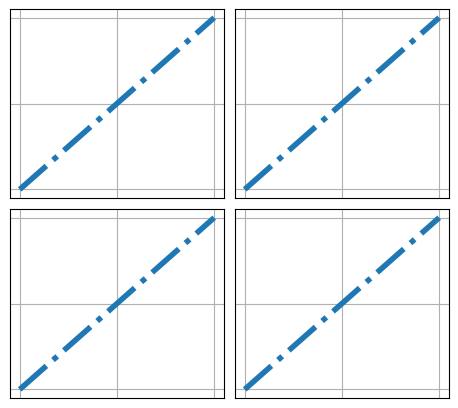

In [478]:
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0,
                            wspace=0)

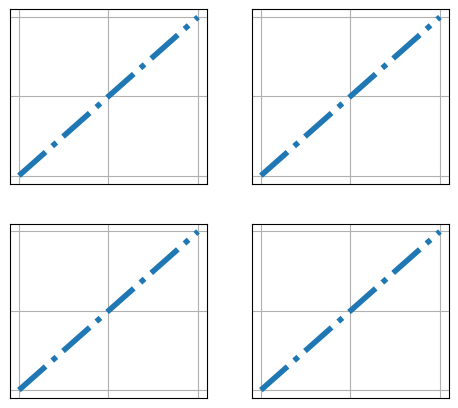

In [479]:
fig, axs = plt.subplots(2, 2, layout="constrained")
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0.2,
                            wspace=0.2)

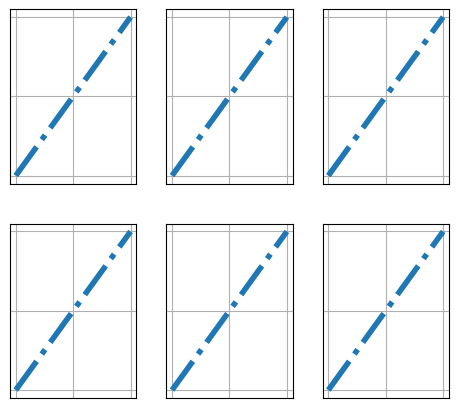

In [480]:
fig, axs = plt.subplots(2, 3, layout="constrained")
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0.2,
                            wspace=0.2)

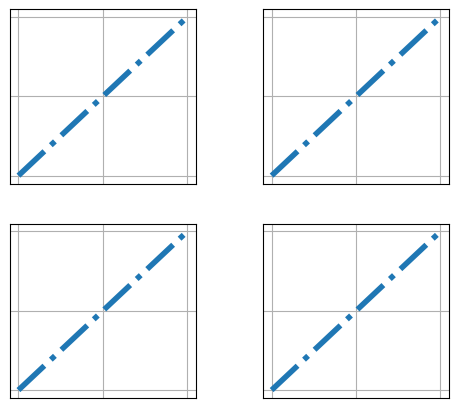

In [481]:
fig, axs = plt.subplots(2, 2, layout="constrained",
                        gridspec_kw={'wspace': 0.3, 'hspace': 0.2})
for ax in axs.flat:
    example_plot(ax, hide_labels=True)
# this has no effect because the space set in the gridspec trumps the
# space set in *constrained layout*.
fig.get_layout_engine().set(w_pad=4 / 72, h_pad=4 / 72, hspace=0.0,
                            wspace=0.0)

### Spacing with colorbars

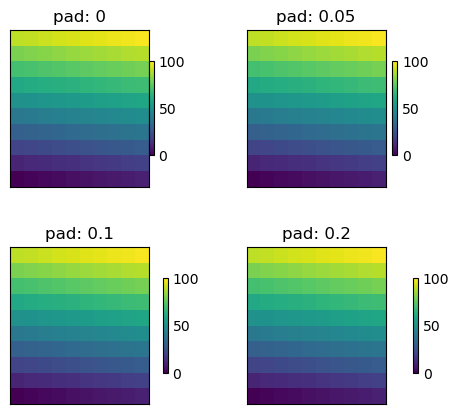

In [482]:
fig, axs = plt.subplots(2, 2, layout="constrained")
pads = [0, 0.05, 0.1, 0.2]
for pad, ax in zip(pads, axs.flat):
    pc = ax.pcolormesh(arr, **pc_kwargs)
    fig.colorbar(pc, ax=ax, shrink=0.6, pad=pad)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(f'pad: {pad}')
fig.get_layout_engine().set(w_pad=2 / 72, h_pad=2 / 72, hspace=0.2,
                            wspace=0.2)

### rcParams

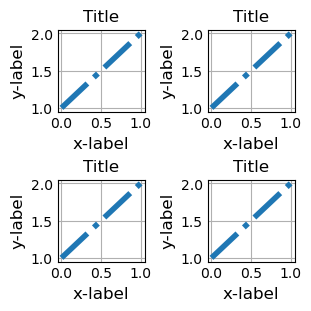

In [483]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axs = plt.subplots(2, 2, figsize=(3, 3))
for ax in axs.flat:
    example_plot(ax)

### Use with GridSpec

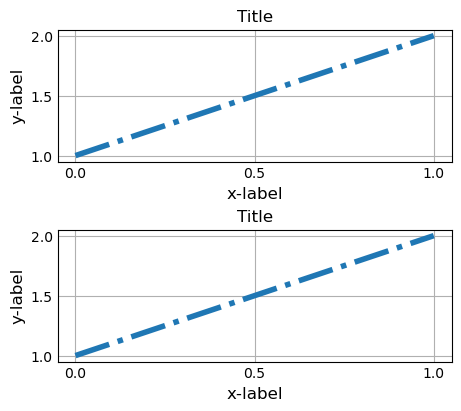

In [484]:
plt.rcParams['figure.constrained_layout.use'] = False
fig = plt.figure(layout="constrained")

gs1 = gridspec.GridSpec(2, 1, figure=fig)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

Text(0.5, 0, 'x-label')

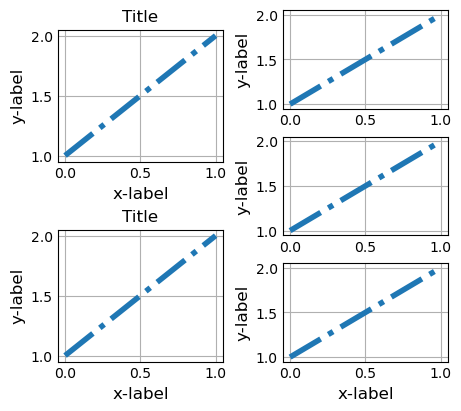

In [485]:
fig = plt.figure(layout="constrained")

gs0 = fig.add_gridspec(1, 2)

gs1 = gs0[0].subgridspec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs2 = gs0[1].subgridspec(3, 1)

for ss in gs2:
    ax = fig.add_subplot(ss)
    example_plot(ax)
    ax.set_title("")
    ax.set_xlabel("")

ax.set_xlabel("x-label", fontsize=12)

Text(0.5, 0.98, 'Overlapping Gridspecs')

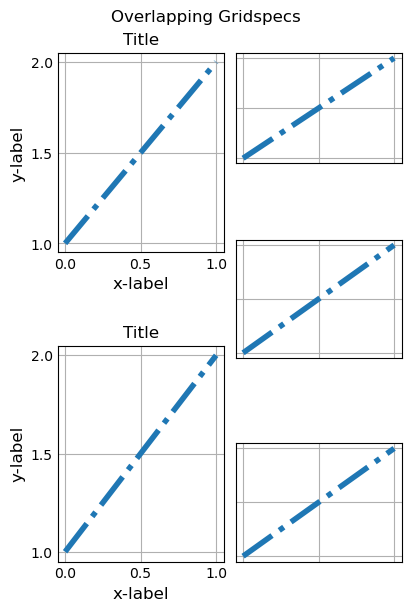

In [486]:
fig = plt.figure(figsize=(4, 6), layout="constrained")

gs0 = fig.add_gridspec(6, 2)

ax1 = fig.add_subplot(gs0[:3, 0])
ax2 = fig.add_subplot(gs0[3:, 0])

example_plot(ax1)
example_plot(ax2)

ax = fig.add_subplot(gs0[0:2, 1])
example_plot(ax, hide_labels=True)
ax = fig.add_subplot(gs0[2:4, 1])
example_plot(ax, hide_labels=True)
ax = fig.add_subplot(gs0[4:, 1])
example_plot(ax, hide_labels=True)
fig.suptitle('Overlapping Gridspecs')

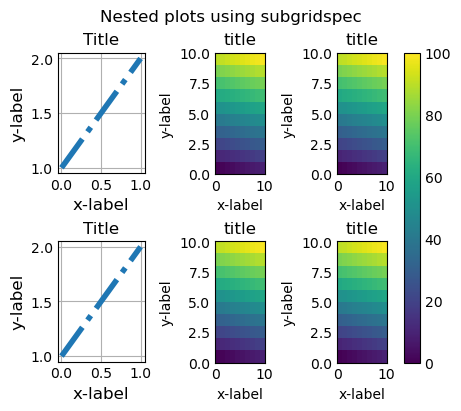

In [487]:
fig = plt.figure(layout="constrained")
gs0 = fig.add_gridspec(1, 2, figure=fig, width_ratios=[1, 2])
gs_left = gs0[0].subgridspec(2, 1)
gs_right = gs0[1].subgridspec(2, 2)

for gs in gs_left:
    ax = fig.add_subplot(gs)
    example_plot(ax)
axs = []
for gs in gs_right:
    ax = fig.add_subplot(gs)
    pcm = ax.pcolormesh(arr, **pc_kwargs)
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    ax.set_title('title')
    axs += [ax]
fig.suptitle('Nested plots using subgridspec')
fig.colorbar(pcm, ax=axs)

Text(0.5, 0.98, 'Nested plots using subfigures')

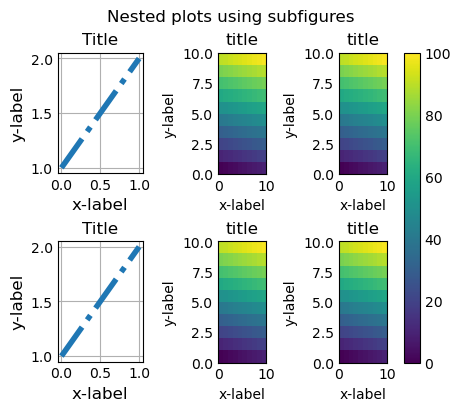

In [488]:
fig = plt.figure(layout="constrained")
sfigs = fig.subfigures(1, 2, width_ratios=[1, 2])

axs_left = sfigs[0].subplots(2, 1)
for ax in axs_left.flat:
    example_plot(ax)

axs_right = sfigs[1].subplots(2, 2)
for ax in axs_right.flat:
    pcm = ax.pcolormesh(arr, **pc_kwargs)
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    ax.set_title('title')
fig.colorbar(pcm, ax=axs_right)
fig.suptitle('Nested plots using subfigures')

### Manually setting Axes positions

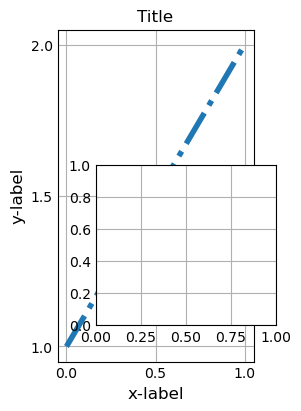

In [489]:
fig, axs = plt.subplots(1, 2, layout="constrained")
example_plot(axs[0], fontsize=12)
axs[1].set_position([0.2, 0.2, 0.4, 0.4])

### Grids of fixed aspect-ratio Axes: "compressed" layout

Text(0.5, 0.98, "fixed-aspect plots, layout='constrained'")

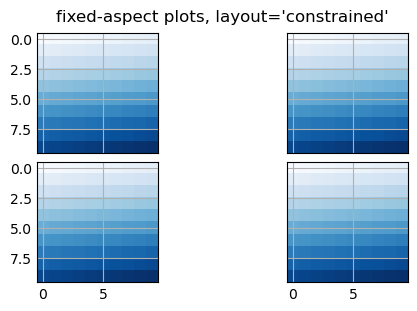

In [490]:
fig, axs = plt.subplots(2, 2, figsize=(5, 3),
                        sharex=True, sharey=True, layout="constrained")
for ax in axs.flat:
    ax.imshow(arr)
fig.suptitle("fixed-aspect plots, layout='constrained'")

Text(0.5, 0.98, "fixed-aspect plots, layout='compressed'")

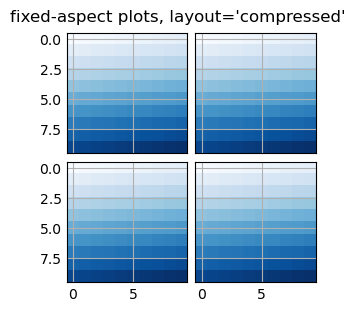

In [491]:
fig, axs = plt.subplots(2, 2, figsize=(5, 3),
                        sharex=True, sharey=True, layout='compressed')
for ax in axs.flat:
    ax.imshow(arr)
fig.suptitle("fixed-aspect plots, layout='compressed'")

### Manually turning off constrained layout

### Limitations
### Incompatible functions

Text(0.5, 0.98, 'Homogenous nrows, ncols')

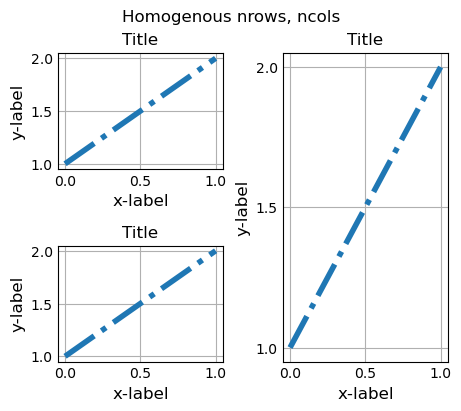

In [492]:
fig = plt.figure(layout="constrained")

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 3)
# third Axes that spans both rows in second column:
ax3 = plt.subplot(2, 2, (2, 4))

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
plt.suptitle('Homogenous nrows, ncols')

Text(0.5, 0.98, 'Mixed nrows, ncols')

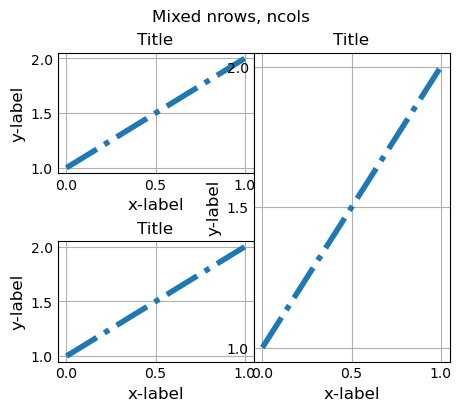

In [493]:
fig = plt.figure(layout="constrained")

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 3)
ax3 = plt.subplot(1, 2, 2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
plt.suptitle('Mixed nrows, ncols')

Text(0.5, 0.98, 'subplot2grid')

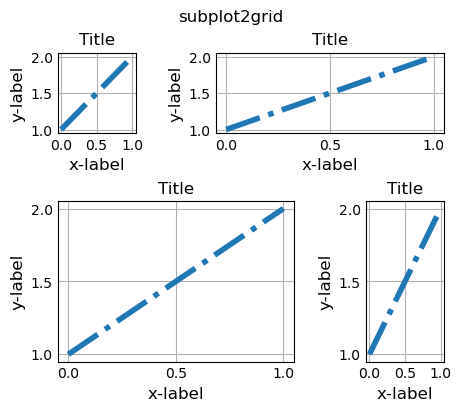

In [494]:
fig = plt.figure(layout="constrained")

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
fig.suptitle('subplot2grid')

### Simple case: one Axes

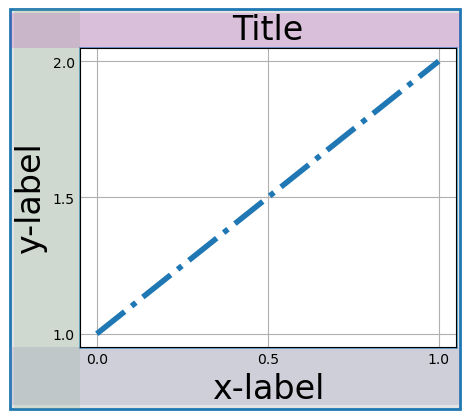

In [495]:
from matplotlib._layoutgrid import plot_children

fig, ax = plt.subplots(layout="constrained")
example_plot(ax, fontsize=24)
plot_children(fig)

### Simple case: two Axes

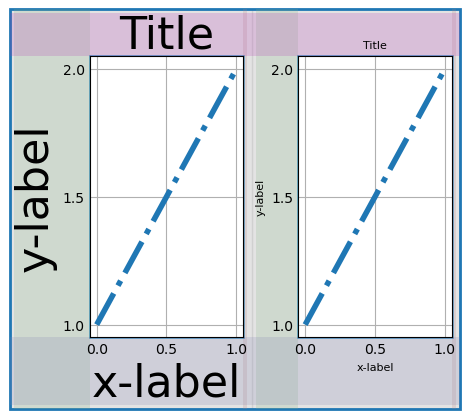

In [496]:
fig, ax = plt.subplots(1, 2, layout="constrained")
example_plot(ax[0], fontsize=32)
example_plot(ax[1], fontsize=8)
plot_children(fig)

### Tight layout guide

### Simple example

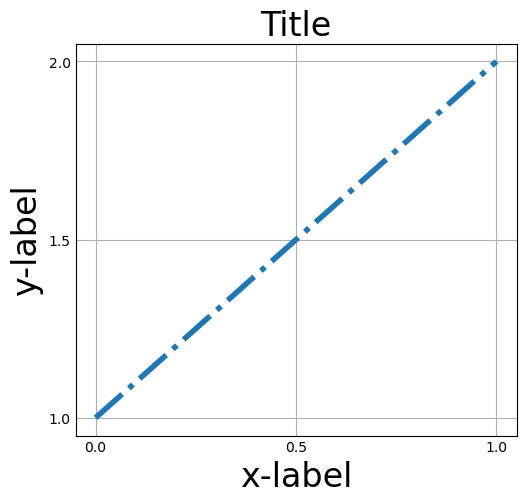

In [497]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.facecolor'] = "0.8"


def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)

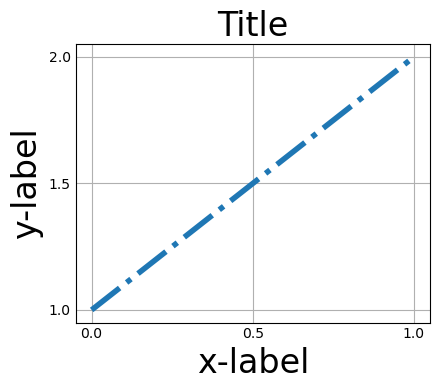

In [498]:
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.tight_layout()

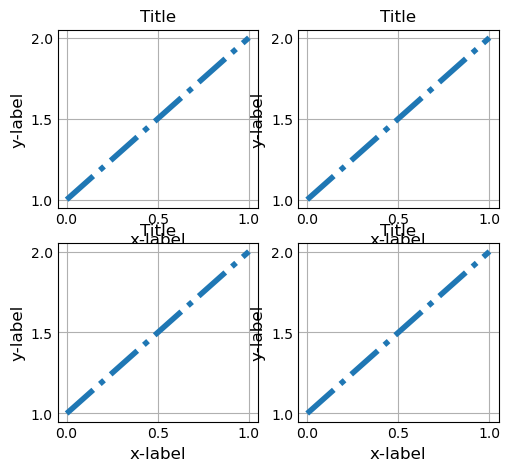

In [499]:
plt.close('all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

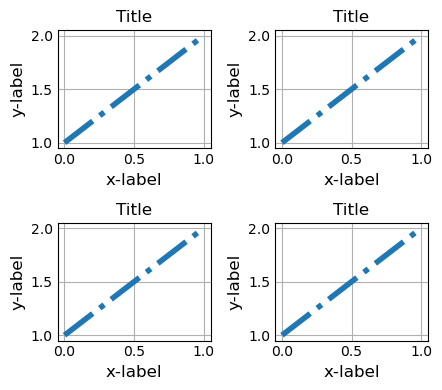

In [500]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout()

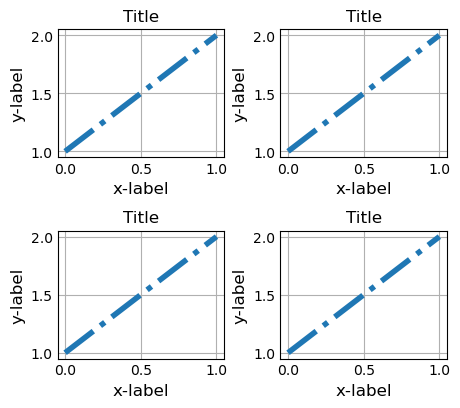

In [501]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

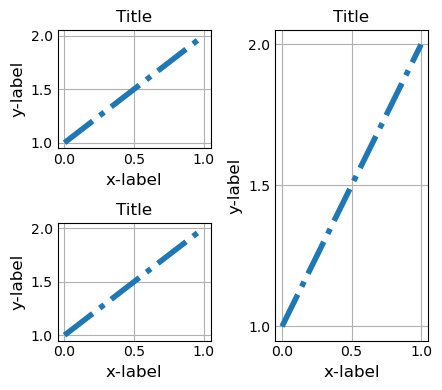

In [502]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)

plt.tight_layout()

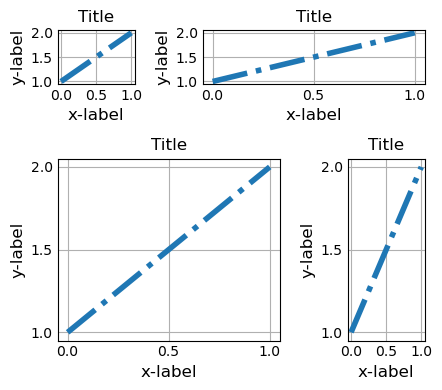

In [503]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.tight_layout()

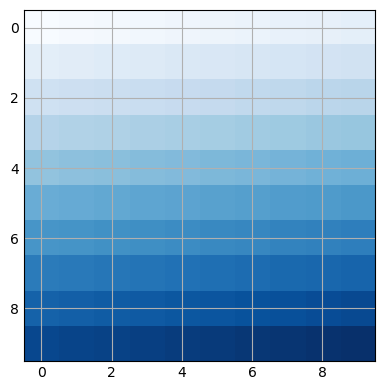

In [504]:
arr = np.arange(100).reshape((10, 10))

plt.close('all')
fig = plt.figure(figsize=(5, 4))

ax = plt.subplot()
im = ax.imshow(arr, interpolation="none")

plt.tight_layout()

### Use with GridSpec

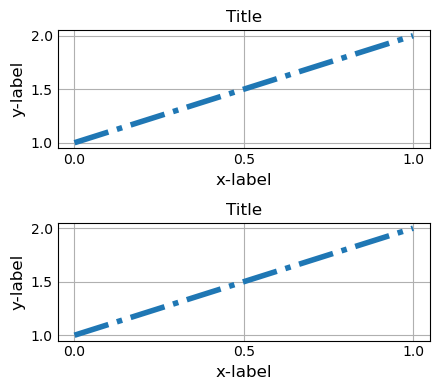

In [505]:
import matplotlib.gridspec as gridspec

plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig)

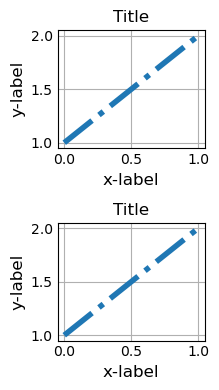

In [506]:
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)

gs1.tight_layout(fig, rect=[0, 0, 0.5, 1.0])

### Legends and annotations

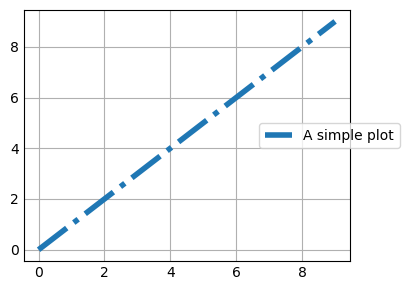

In [507]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='A simple plot')
ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
fig.tight_layout()
plt.show()

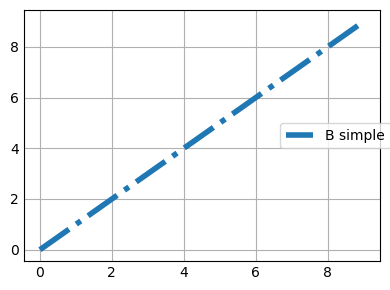

In [508]:
fig, ax = plt.subplots(figsize=(4, 3))
lines = ax.plot(range(10), label='B simple plot')
leg = ax.legend(bbox_to_anchor=(0.7, 0.5), loc='center left',)
leg.set_in_layout(False)
fig.tight_layout()
plt.show()

### Use with AxesGrid1

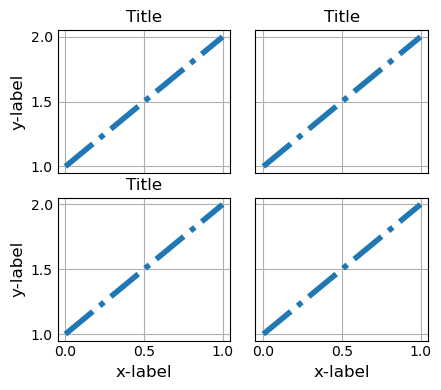

In [509]:
from mpl_toolkits.axes_grid1 import Grid

plt.close('all')
fig = plt.figure()
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.25, label_mode='L',
            )

for ax in grid:
    example_plot(ax)
ax.title.set_visible(False)

plt.tight_layout()

### Colorbar

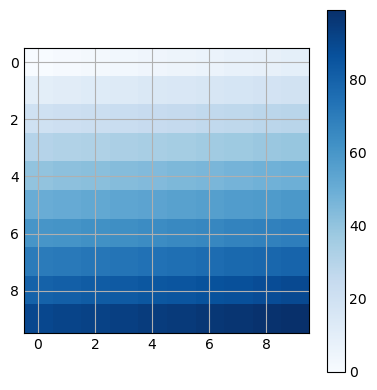

In [510]:
plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

plt.colorbar(im)

plt.tight_layout()

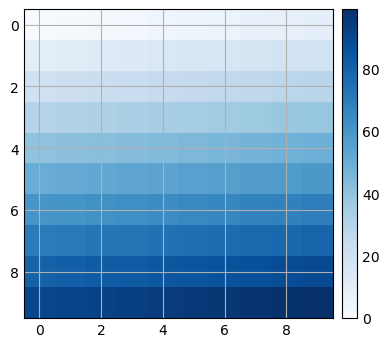

In [511]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.close('all')
arr = np.arange(100).reshape((10, 10))
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(arr, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)

plt.tight_layout()

### Customizing Matplotlib with style sheets and rcParams

### Runtime rc setting

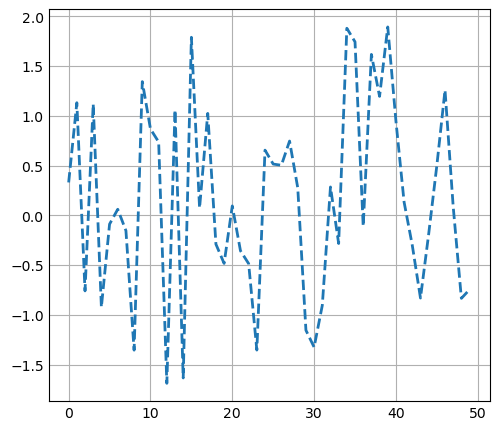

In [512]:
from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

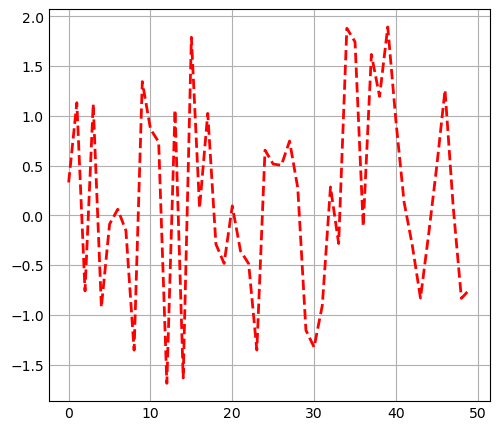

In [513]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

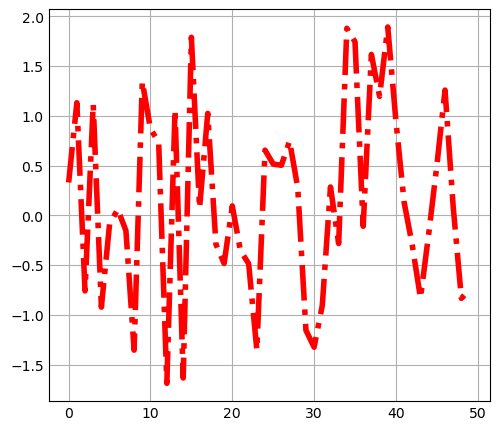

In [514]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

### Temporary rc settings

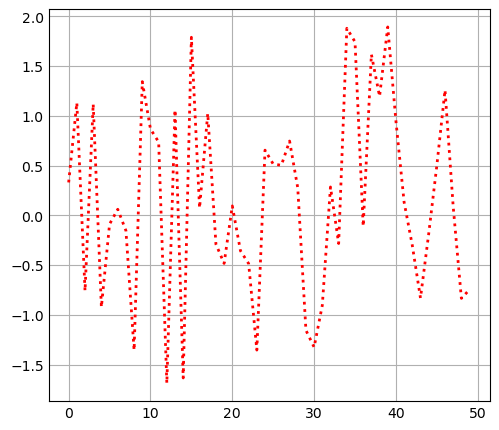

In [515]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

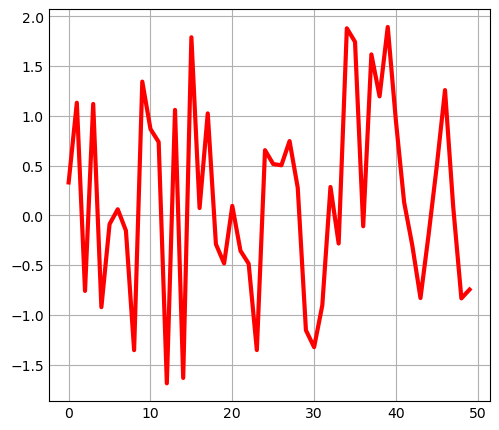

In [516]:
@mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
def plotting_function():
    plt.plot(data)

plotting_function()

### Temporary styling

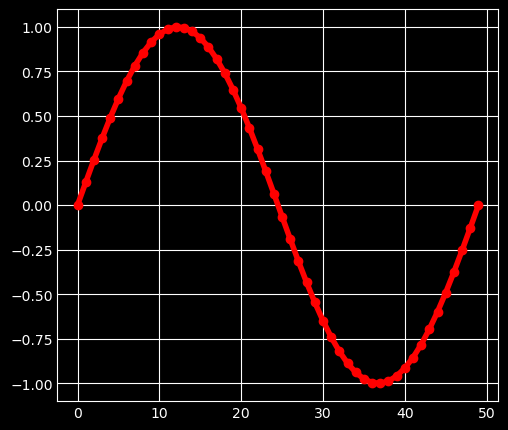

In [517]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

### Colors

### Specifying colour

(-0.2, 13.0, -1.0, 1.0)

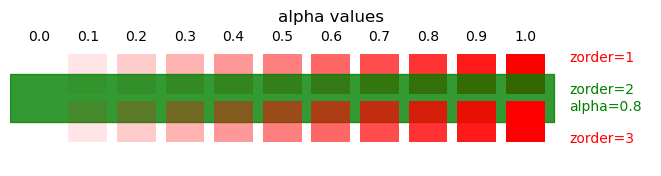

In [518]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(6.5, 1.65), layout='constrained')
ax.add_patch(Rectangle((-0.2, -0.35), 11.2, 0.7, color='C1', alpha=0.8))
for i, alpha in enumerate(np.linspace(0, 1, 11)):
    ax.add_patch(Rectangle((i, 0.05), 0.8, 0.6, alpha=alpha, zorder=0))
    ax.text(i+0.4, 0.85, f"{alpha:.1f}", ha='center')
    ax.add_patch(Rectangle((i, -0.05), 0.8, -0.6, alpha=alpha, zorder=2))
ax.set_xlim(-0.2, 13)
ax.set_ylim(-1, 1)
ax.set_title('alpha values')
ax.text(11.3, 0.6, 'zorder=1', va='center', color='C0')
ax.text(11.3, 0, 'zorder=2\nalpha=0.8', va='center', color='C1')
ax.text(11.3, -0.6, 'zorder=3', va='center', color='C0')
ax.axis('off')

### Customized Colorbars

In [519]:
import matplotlib.pyplot as plt
import matplotlib as mpl

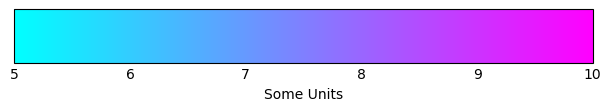

In [520]:
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Some Units')

### Creating Colormaps in Matplotlib

In [521]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

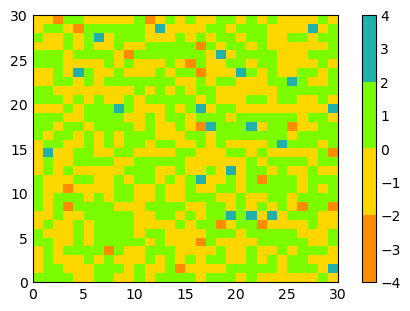

In [522]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
plot_examples([cmap])

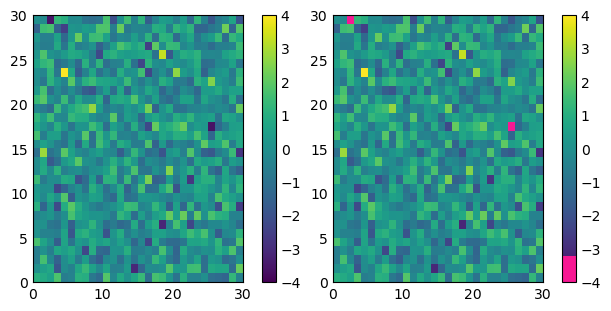

In [523]:
viridis = mpl.colormaps['viridis'].resampled(256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

plot_examples([viridis, newcmp])

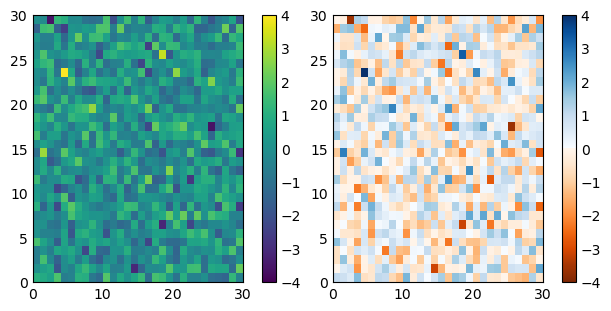

In [524]:
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])

### Colormap normalization

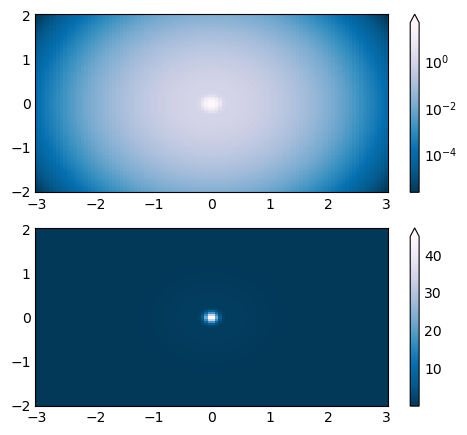

In [525]:
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale, so we see both hump and spike. A linear
# scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
Z = Z1 + 50 * Z2

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[0], extend='max')

pcm = ax[1].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=ax[1], extend='max')
plt.show()

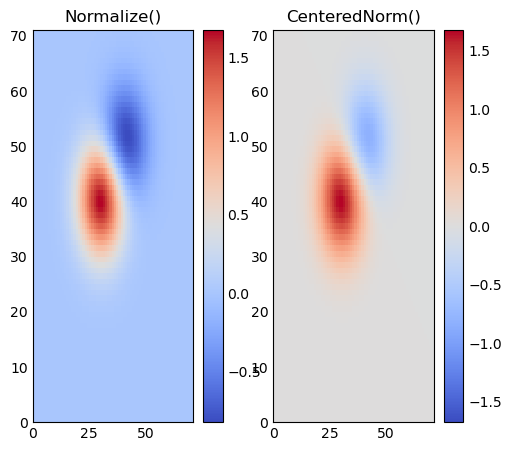

In [526]:
delta = 0.1
x = np.arange(-3.0, 4.001, delta)
y = np.arange(-4.0, 3.001, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (0.9*Z1 - 0.5*Z2) * 2

# select a divergent colormap
cmap = cm.coolwarm

fig, (ax1, ax2) = plt.subplots(ncols=2)
pc = ax1.pcolormesh(Z, cmap=cmap)
fig.colorbar(pc, ax=ax1)
ax1.set_title('Normalize()')

pc = ax2.pcolormesh(Z, norm=colors.CenteredNorm(), cmap=cmap)
fig.colorbar(pc, ax=ax2)
ax2.set_title('CenteredNorm()')

plt.show()

### Choosing Colormaps in Matplotlib

In [527]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

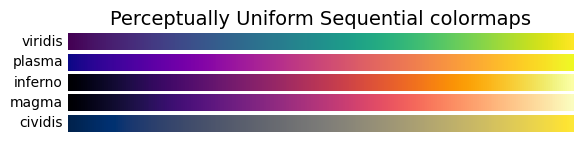

In [528]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

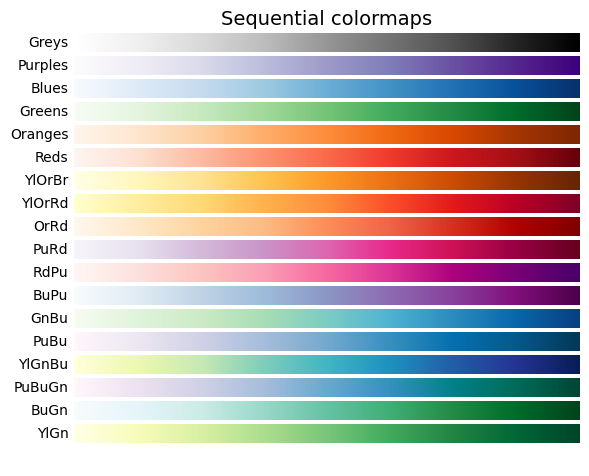

In [529]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

### Text in Matplotlib

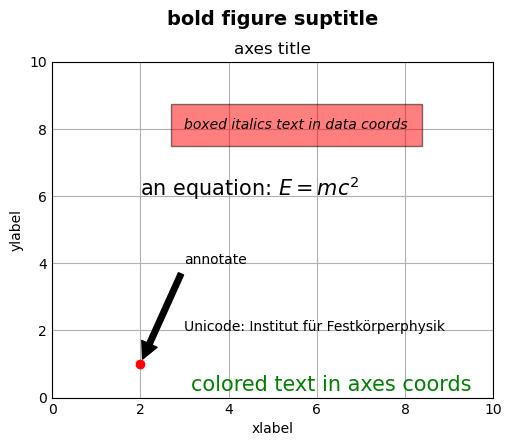

In [530]:
import matplotlib.pyplot as plt

import matplotlib

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'Unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Plot types

## Pairwise data

### plot(x, y)

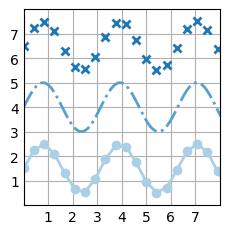

In [531]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 1 * np.sin(2 * x)
x2 = np.linspace(0, 10, 25)
y2 = 4 + 1 * np.sin(2 * x2)

# plot
fig, ax = plt.subplots()

ax.plot(x2, y2 + 2.5, 'x', markeredgewidth=2)
ax.plot(x, y, linewidth=2.0)
ax.plot(x2, y2 - 2.5, 'o-', linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### scatter(x, y)

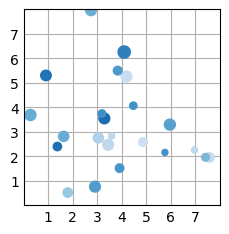

In [532]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### bar(x, height)

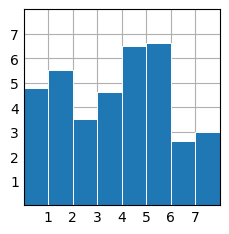

In [533]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### stem(x, y)

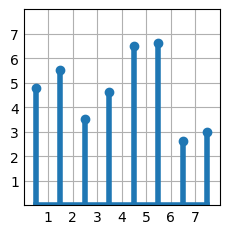

In [534]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### fill_between(x, y1, y2)

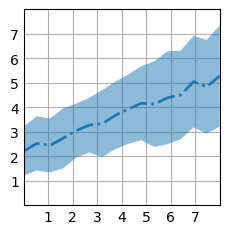

In [535]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### stackplot(x, y)

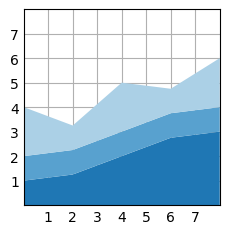

In [536]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### stairs(values)

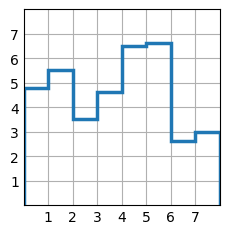

In [537]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stairs(y, linewidth=2.5)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### Statistical distributions

### hist(x)

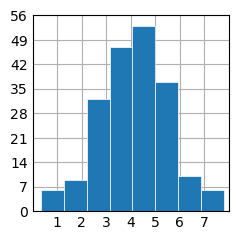

In [538]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

### boxplot(X)

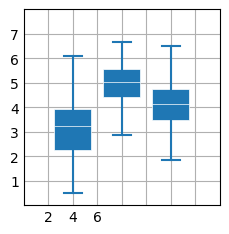

In [539]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### errorbar(x, y, yerr, xerr)

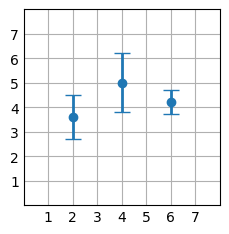

In [540]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(1)
x = [2, 4, 6]
y = [3.6, 5, 4.2]
yerr = [0.9, 1.2, 0.5]

# plot:
fig, ax = plt.subplots()

ax.errorbar(x, y, yerr, fmt='o', linewidth=2, capsize=6)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### violinplot(D)

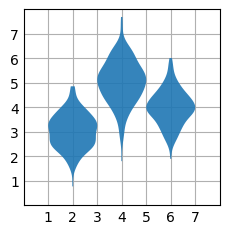

In [541]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(10)
D = np.random.normal((3, 5, 4), (0.75, 1.00, 0.75), (200, 3))

# plot:
fig, ax = plt.subplots()

vp = ax.violinplot(D, [2, 4, 6], widths=2,
                   showmeans=False, showmedians=False, showextrema=False)
# styling:
for body in vp['bodies']:
    body.set_alpha(0.9)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### eventplot(D)

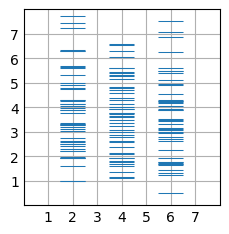

In [542]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))

# plot:
fig, ax = plt.subplots()

ax.eventplot(D, orientation="vertical", lineoffsets=x, linewidth=0.75)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### hist2d(x, y)

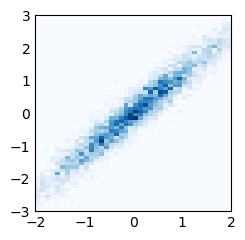

In [543]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hist2d(x, y, bins=(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1)))

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

### hexbin(x, y, C)

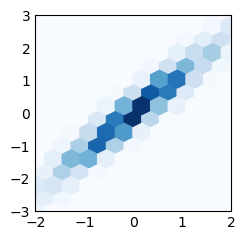

In [544]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data: correlated + noise
np.random.seed(1)
x = np.random.randn(5000)
y = 1.2 * x + np.random.randn(5000) / 3

# plot:
fig, ax = plt.subplots()

ax.hexbin(x, y, gridsize=20)

ax.set(xlim=(-2, 2), ylim=(-3, 3))

plt.show()

### pie(x)

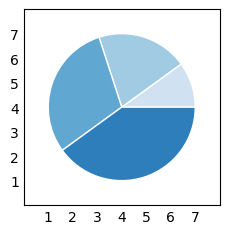

In [545]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### ecdf(x)

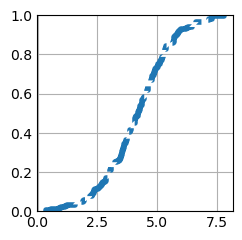

In [546]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()
ax.ecdf(x)
plt.show()

### Gridded data

### imshow(Z)

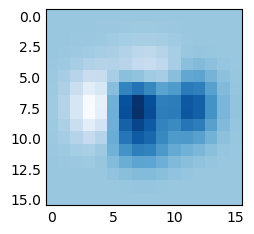

In [547]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.imshow(Z)

plt.show()

### pcolormesh(X, Y, Z)

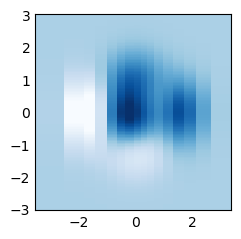

In [548]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data with uneven sampling in x
x = [-3, -2, -1.6, -1.2, -.8, -.5, -.2, .1, .3, .5, .8, 1.1, 1.5, 1.9, 2.3, 3]
X, Y = np.meshgrid(x, np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.pcolormesh(X, Y, Z, vmin=-0.5, vmax=1.0)

plt.show()

### contour(X, Y, Z)

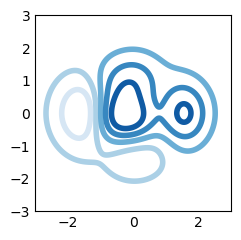

In [549]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(np.min(Z), np.max(Z), 7)

# plot
fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=levels)

plt.show()

### contourf(X, Y, Z)

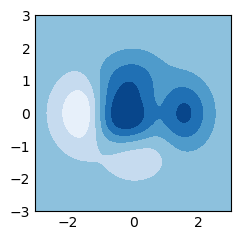

In [550]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()

### barbs(X, Y, U, V)

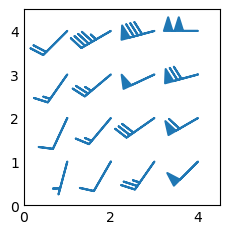

In [551]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data:
X, Y = np.meshgrid([1, 2, 3, 4], [1, 2, 3, 4])
angle = np.pi / 180 * np.array([[15., 30, 35, 45],
                                [25., 40, 55, 60],
                                [35., 50, 65, 75],
                                [45., 60, 75, 90]])
amplitude = np.array([[5, 10, 25, 50],
                      [10, 15, 30, 60],
                      [15, 26, 50, 70],
                      [20, 45, 80, 100]])
U = amplitude * np.sin(angle)
V = amplitude * np.cos(angle)

# plot:
fig, ax = plt.subplots()

ax.barbs(X, Y, U, V, barbcolor='C0', flagcolor='C0', length=7, linewidth=1.5)

ax.set(xlim=(0, 4.5), ylim=(0, 4.5))

plt.show()

### quiver(X, Y, U, V)

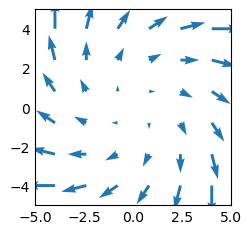

In [552]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data
x = np.linspace(-4, 4, 6)
y = np.linspace(-4, 4, 6)
X, Y = np.meshgrid(x, y)
U = X + Y
V = Y - X

# plot
fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, color="C0", angles='xy',
          scale_units='xy', scale=5, width=.015)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.show()

### streamplot(X, Y, U, V)

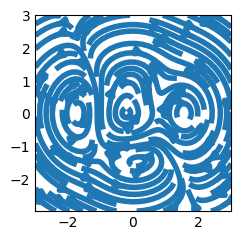

In [553]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make a stream function:
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
# make U and V out of the streamfunction:
V = np.diff(Z[1:, :], axis=1)
U = -np.diff(Z[:, 1:], axis=0)

# plot:
fig, ax = plt.subplots()

ax.streamplot(X[1:, 1:], Y[1:, 1:], U, V)

plt.show()

### Irregularly gridded data

### tricontour(x, y, z)

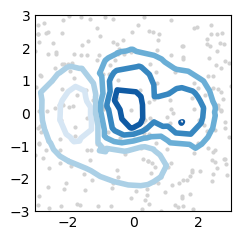

In [554]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data:
np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
levels = np.linspace(z.min(), z.max(), 7)

# plot:
fig, ax = plt.subplots()

ax.plot(x, y, 'o', markersize=2, color='lightgrey')
ax.tricontour(x, y, z, levels=levels)

ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

### tricontourf(x, y, z)

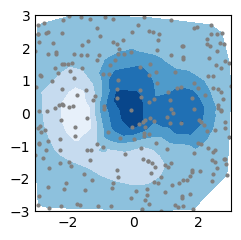

In [555]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data:
np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)
levels = np.linspace(z.min(), z.max(), 7)

# plot:
fig, ax = plt.subplots()

ax.plot(x, y, 'o', markersize=2, color='grey')
ax.tricontourf(x, y, z, levels=levels)

ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

### tripcolor(x, y, z)

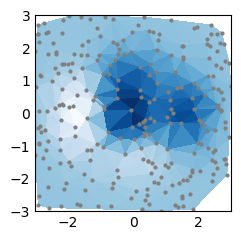

In [556]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data:
np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# plot:
fig, ax = plt.subplots()

ax.plot(x, y, 'o', markersize=2, color='grey')
ax.tripcolor(x, y, z)

ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

### triplot(x, y)

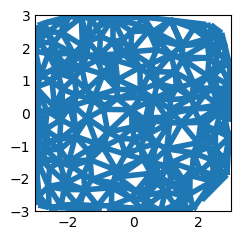

In [557]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')

# make data:
np.random.seed(1)
x = np.random.uniform(-3, 3, 256)
y = np.random.uniform(-3, 3, 256)
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2)

# plot:
fig, ax = plt.subplots()

ax.triplot(x, y)

ax.set(xlim=(-3, 3), ylim=(-3, 3))

plt.show()

### 3D and volumetric data

### scatter(xs, ys, zs)

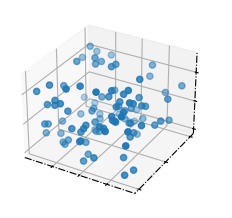

In [558]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Make data
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

### plot_surface(X, Y, Z)

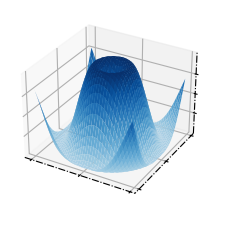

In [559]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

### plot_trisurf(x, y, z)

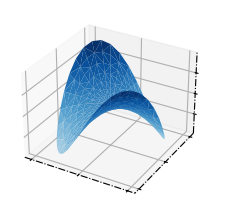

In [560]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

plt.style.use('_mpl-gallery')

n_radii = 8
n_angles = 36

# Make radii and angles spaces
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(x, y, z, vmin=z.min() * 2, cmap=cm.Blues)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

### voxels([x, y, z], filled)

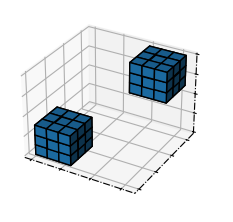

In [561]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# Prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# Draw cuboids in the top left and bottom right corners
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)

# Combine the objects into a single boolean array
voxelarray = cube1 | cube2

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.voxels(voxelarray, edgecolor='k')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

### plot_wireframe(X, Y, Z)

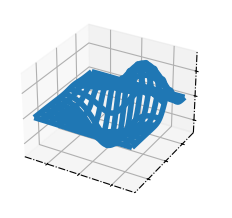

In [562]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

plt.style.use('_mpl-gallery')

# Make data
X, Y, Z = axes3d.get_test_data(0.05)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

# Task Questions

### Basic Plots:

In [563]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('fmri')
print(data.head())



  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


# 1. Simple Line Plot
### 

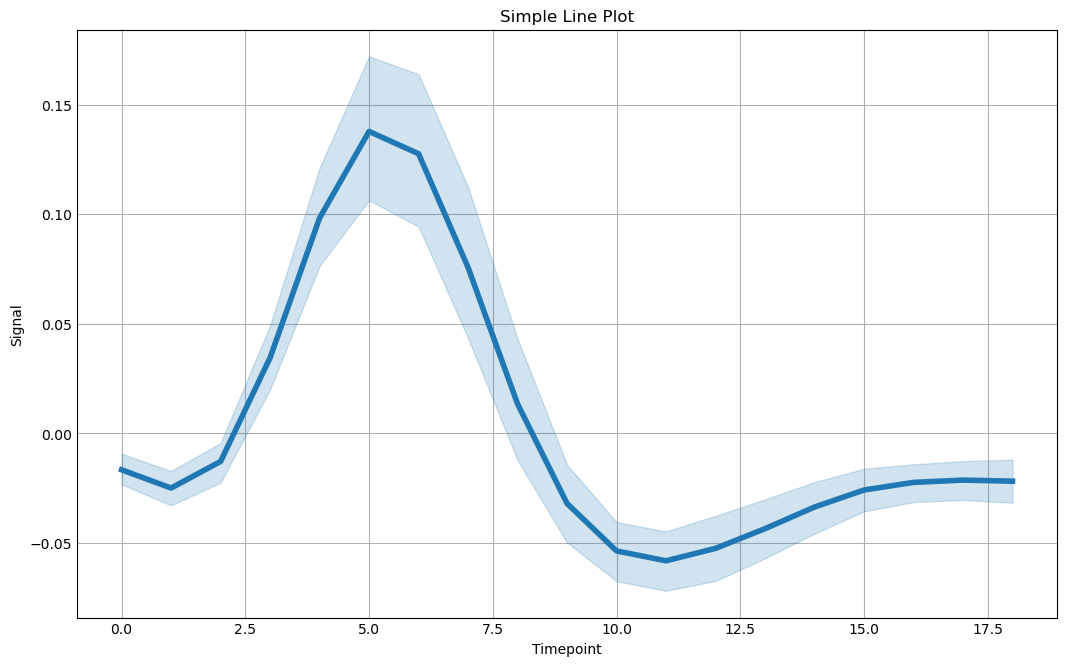

In [564]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='timepoint', y='signal')
plt.title('Simple Line Plot')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.show()



###  2. Plot Multiple Lines on the Same Graph

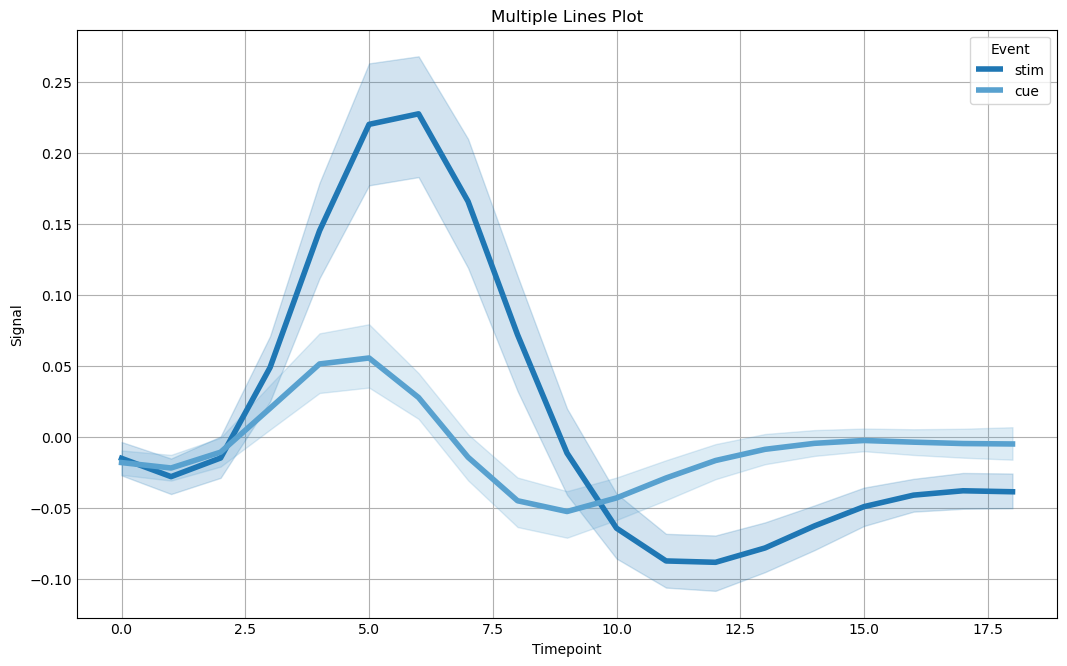

In [565]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='timepoint', y='signal', hue='event')
plt.title('Multiple Lines Plot')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.legend(title='Event')
plt.show()



### 3. Add Markers to a Line Plot

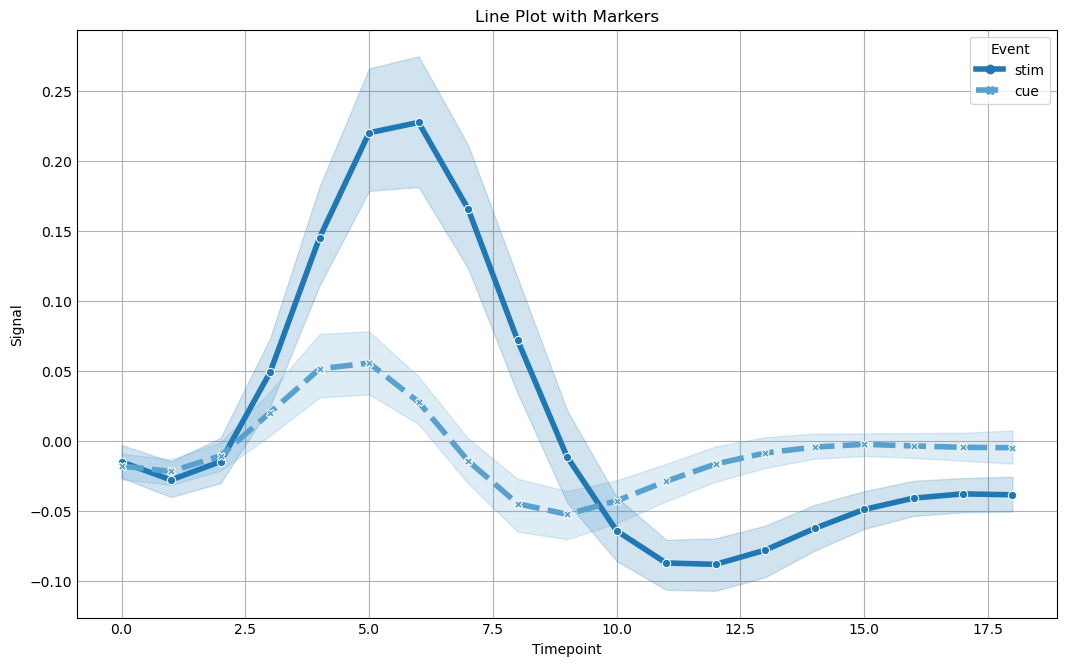

In [566]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='timepoint', y='signal', hue='event', style='event', markers=True)
plt.title('Line Plot with Markers')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.legend(title='Event')
plt.show()



###  4. Customize Line Styles and Colors

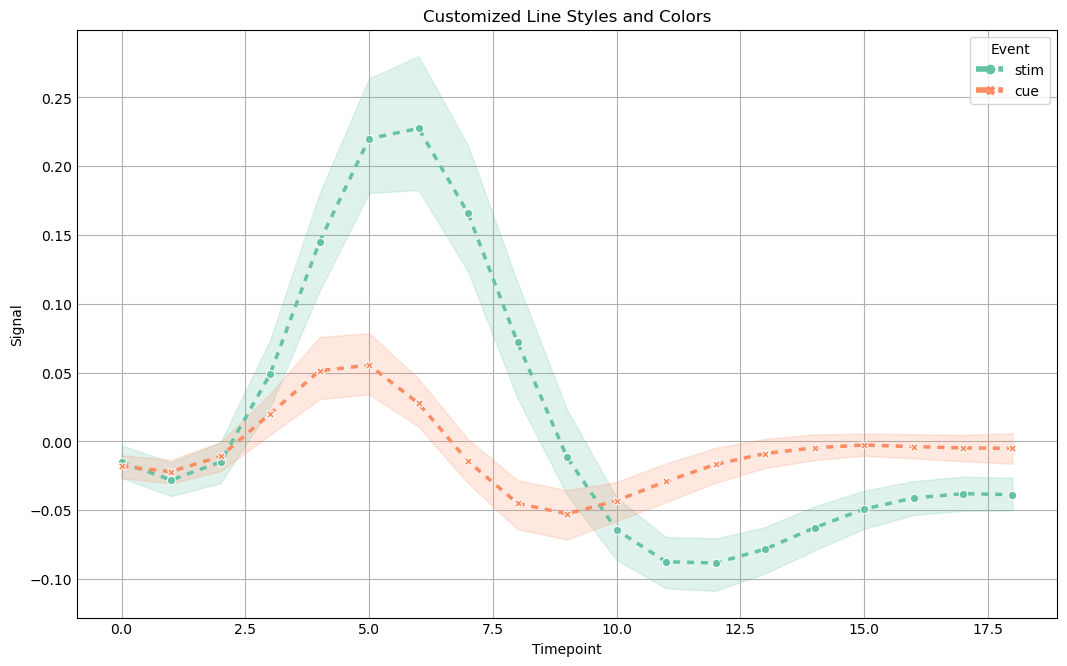

In [567]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='timepoint', y='signal', hue='event', style='event', markers=True,
             palette='Set2', dashes=[(2, 2), (2, 2)], linewidth=2.5)
plt.title('Customized Line Styles and Colors')
plt.xlabel('Timepoint')
plt.ylabel('Signal')
plt.legend(title='Event')
plt.show()


### Scatter Plots:



In [568]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('iris')
print(data.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Create a basic scatter plot.



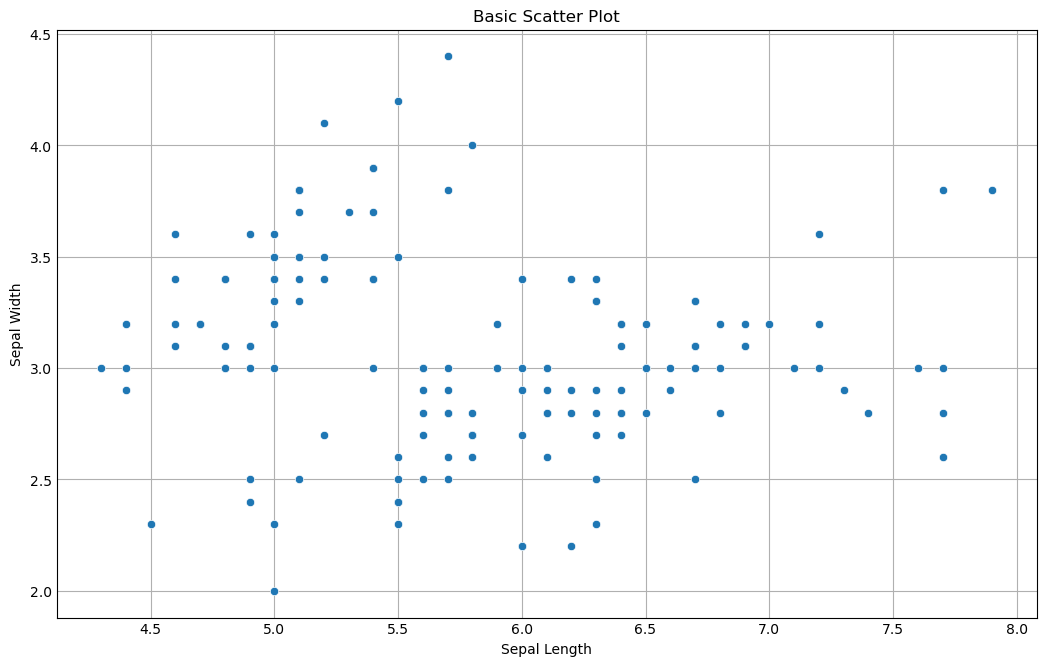

In [569]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width')
plt.title('Basic Scatter Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


### Customize marker styles, sizes, and colors.


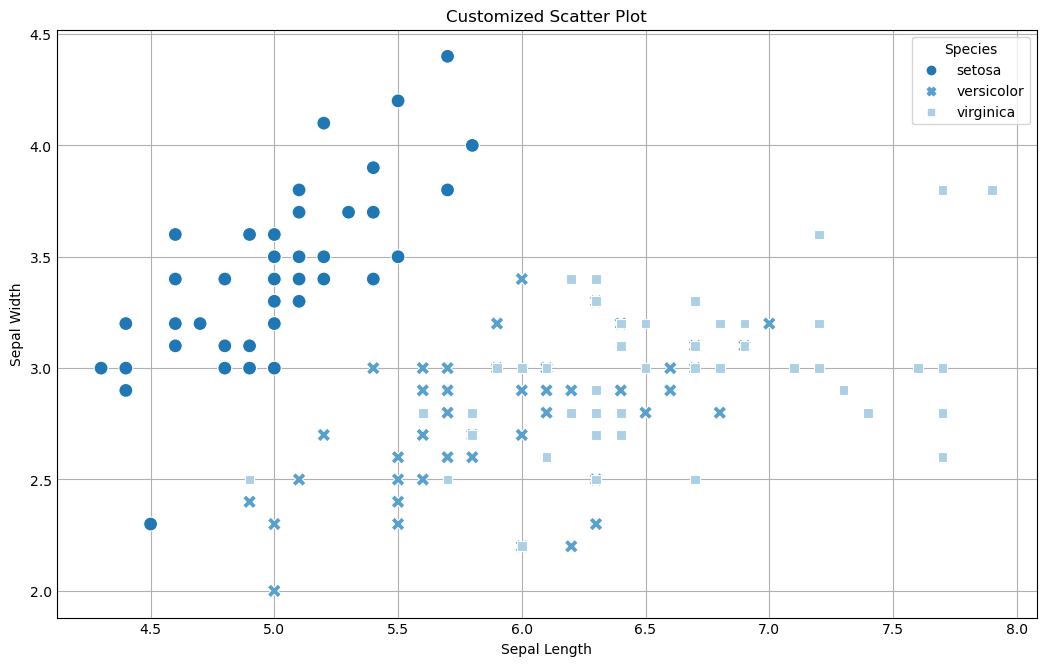

In [570]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Customized Scatter Plot')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()


### Plot multiple scatter plots on the same graph.


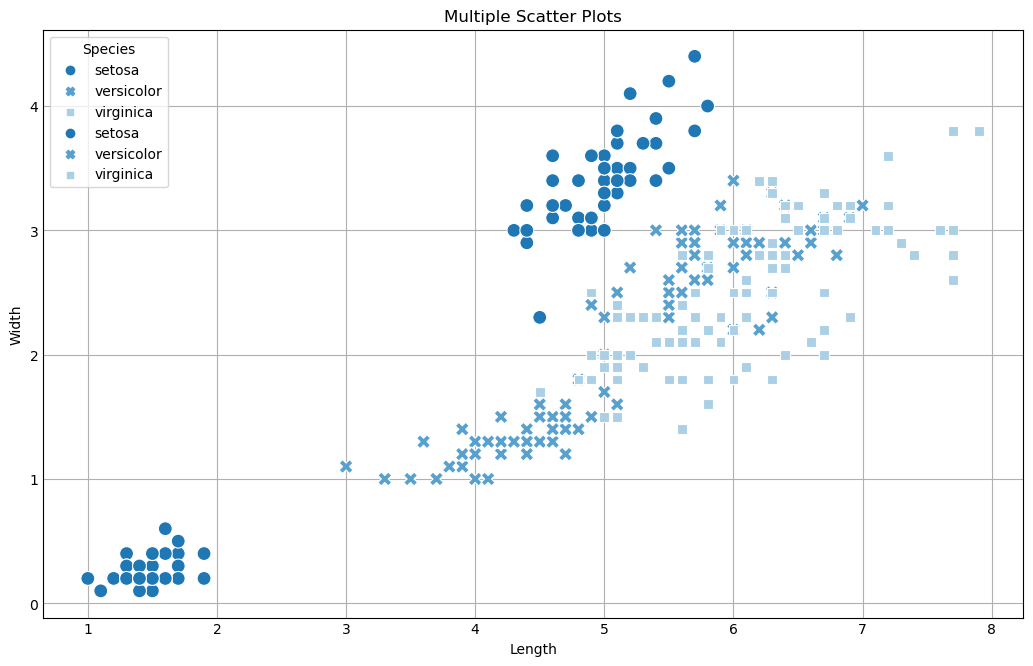

In [571]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species', style='species', s=100, marker='D')
plt.title('Multiple Scatter Plots')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(title='Species')
plt.show()


### Add labels and titles to the scatter plot.

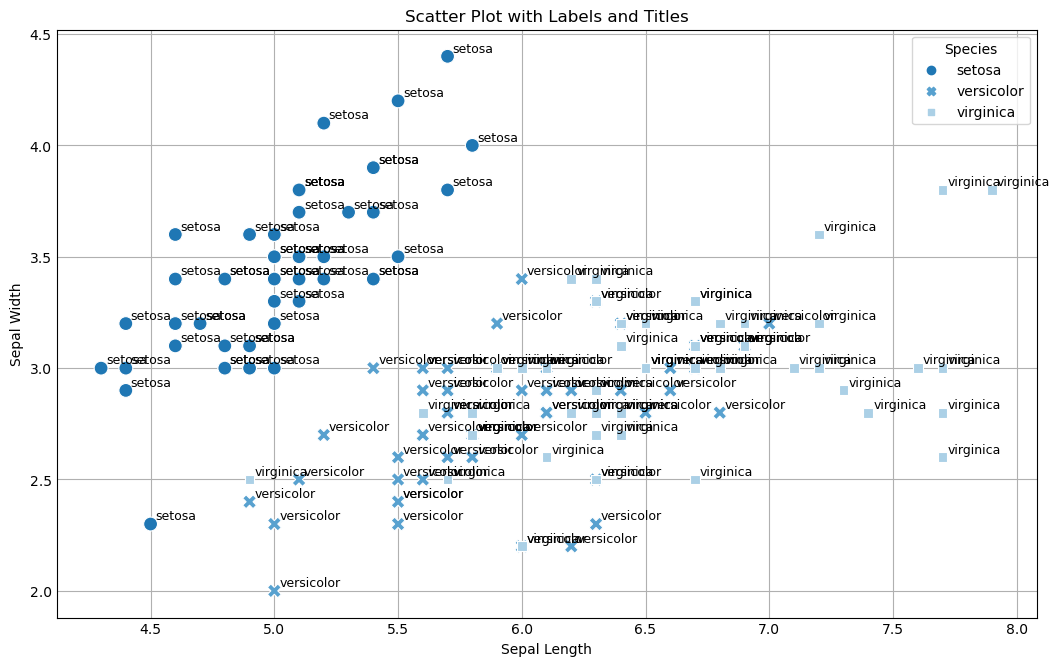

In [572]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Scatter Plot with Labels and Titles')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')


for i in range(len(data)):
    plt.text(data['sepal_length'][i] + 0.02, data['sepal_width'][i] + 0.02, data['species'][i], fontsize=9)

plt.legend(title='Species')
plt.show()


### Bar Charts:


In [573]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

# Load the tips dataset
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Create a vertical bar chart.



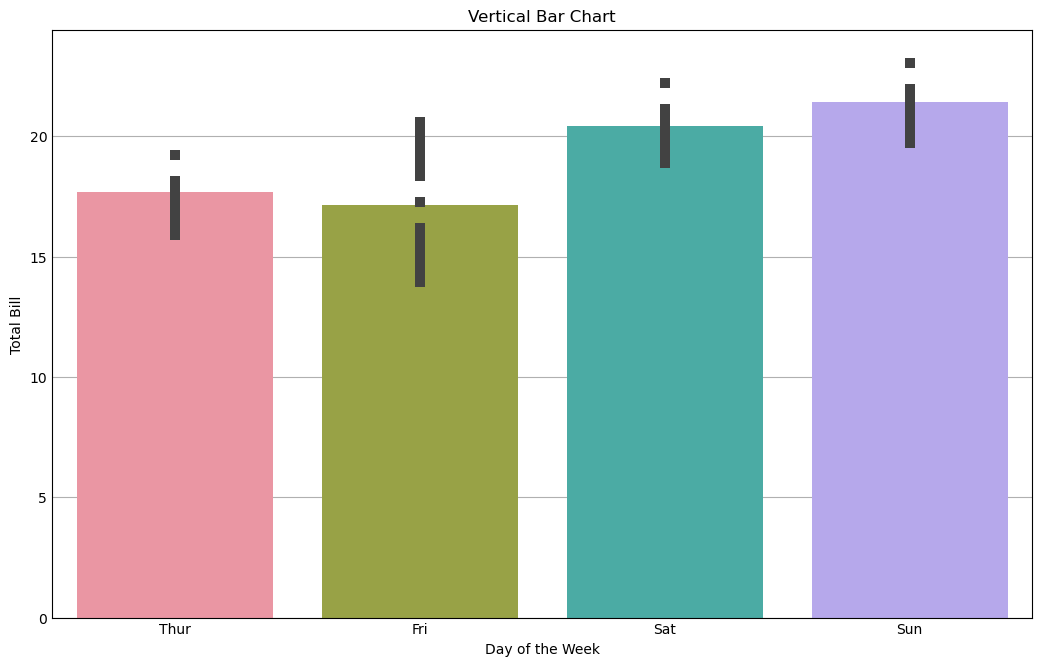

In [574]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='day', y='total_bill')
plt.title('Vertical Bar Chart')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.show()


### Create a horizontal bar chart.


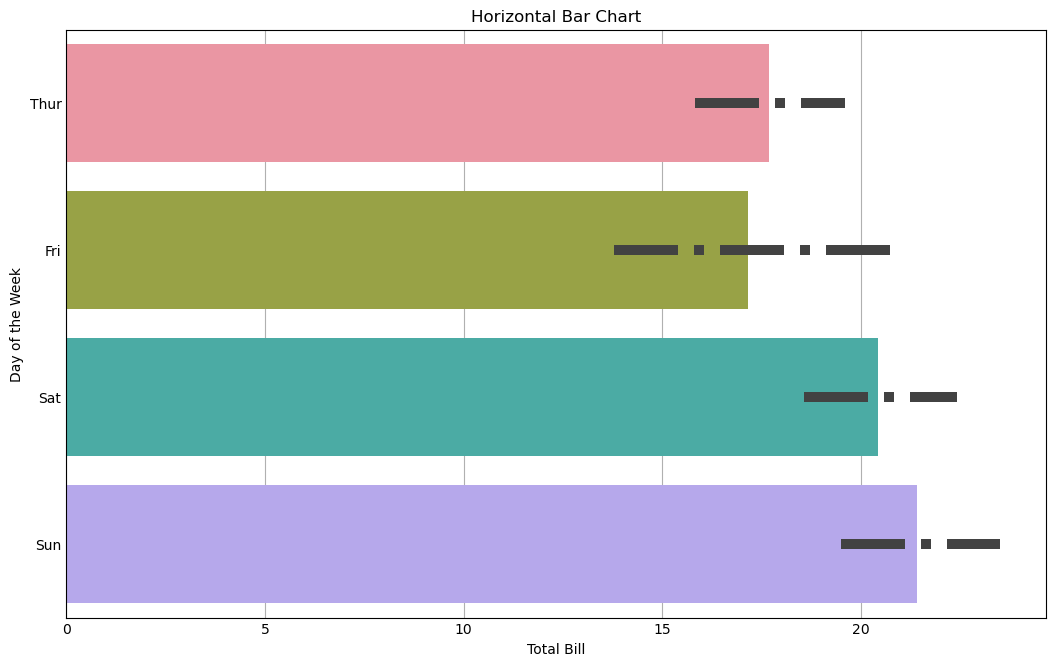

In [575]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='total_bill', y='day')
plt.title('Horizontal Bar Chart')
plt.xlabel('Total Bill')
plt.ylabel('Day of the Week')
plt.show()


### Customize bar colors and add edge colors.

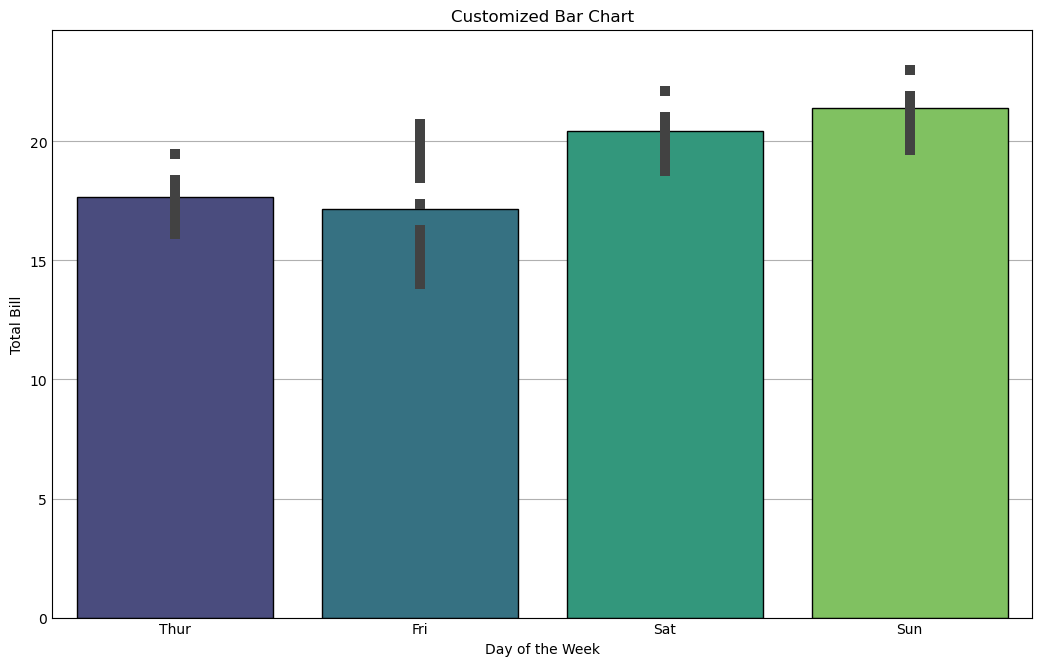

In [576]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='day', y='total_bill', palette='viridis', edgecolor='black')
plt.title('Customized Bar Chart')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.show()


### Pie Charts:



In [577]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = sns.load_dataset('titanic')
print(data.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Create a basic pie chart.


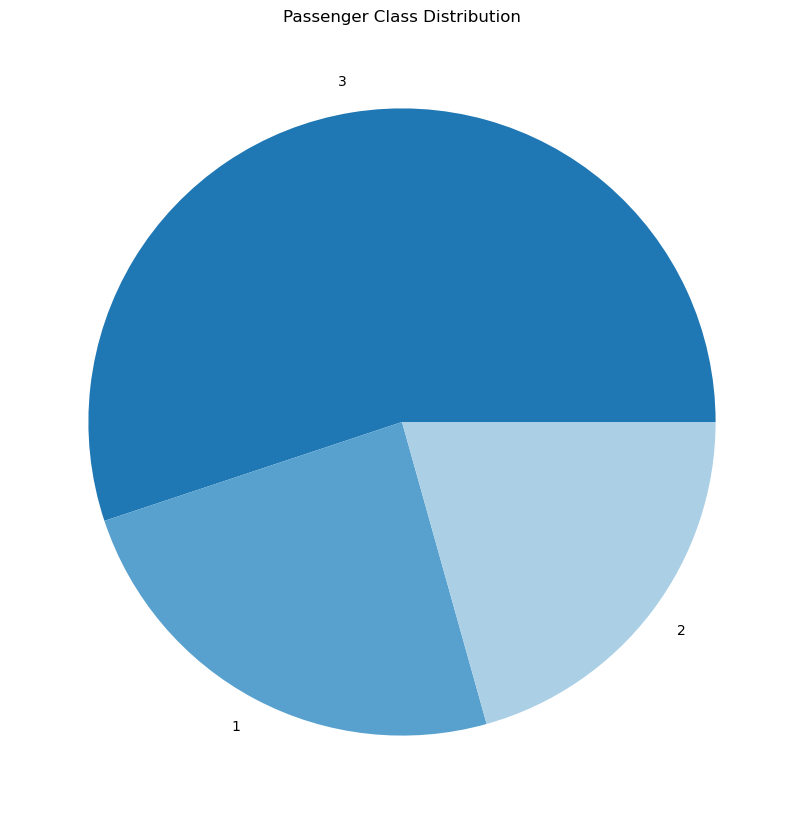

In [578]:
class_counts = data['pclass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index)
plt.title('Passenger Class Distribution')
plt.show()


### Customize slice colors and add a legend.


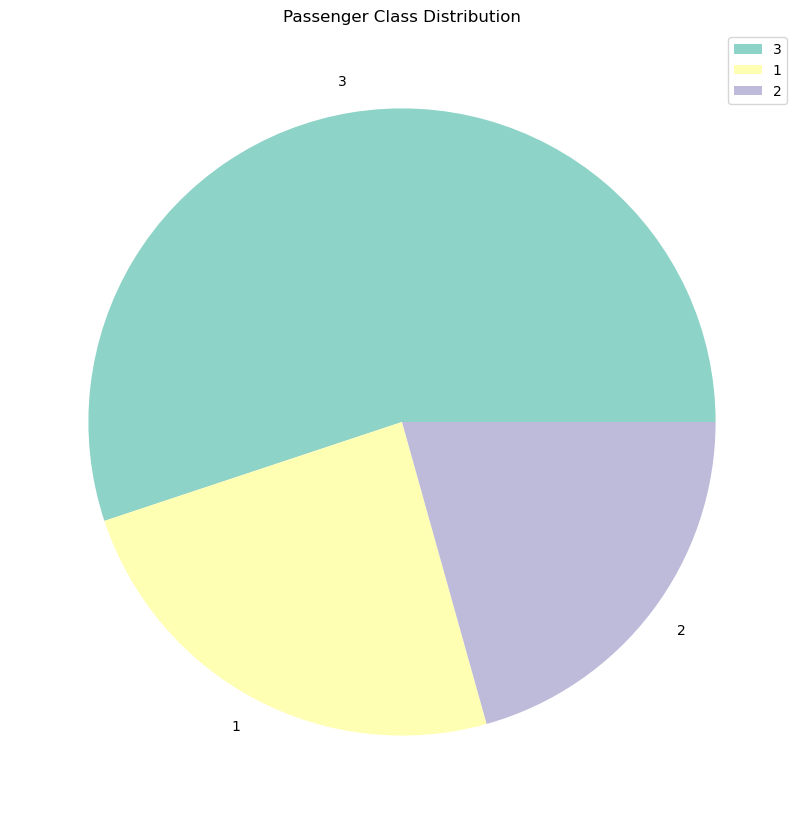

In [579]:
colors = sns.color_palette('Set3')
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, colors=colors)
plt.title('Passenger Class Distribution')
plt.legend(labels=class_counts.index, loc='upper right')
plt.show()


### Explode a slice of the pie chart.


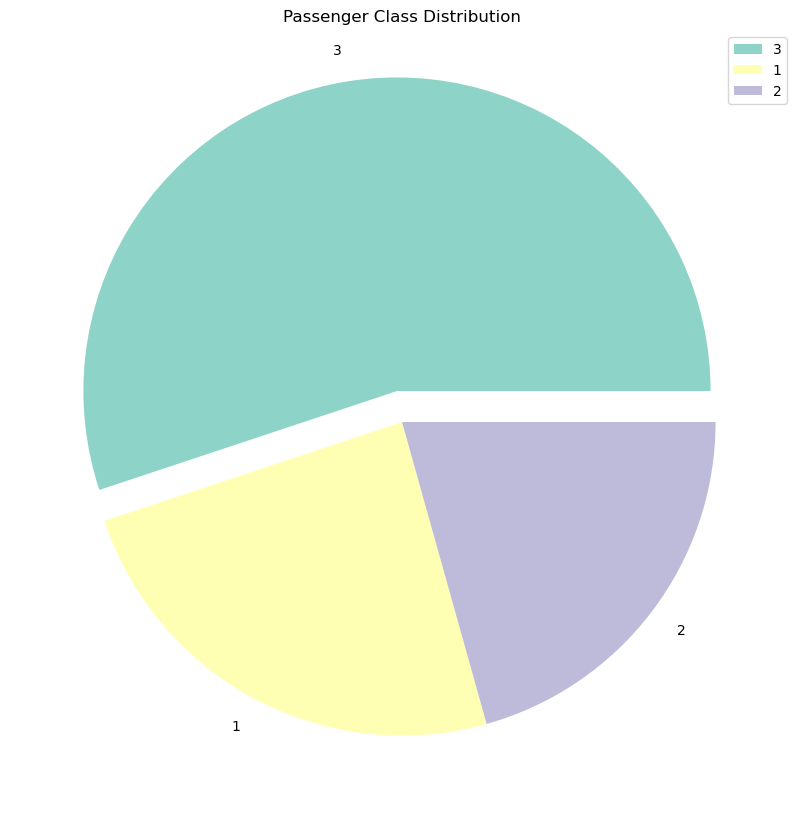

In [580]:
explode = [0.1, 0, 0] 
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, colors=colors, explode=explode)
plt.title('Passenger Class Distribution')
plt.legend(labels=class_counts.index, loc='upper right')
plt.show()


### Add percentage labels to slices.

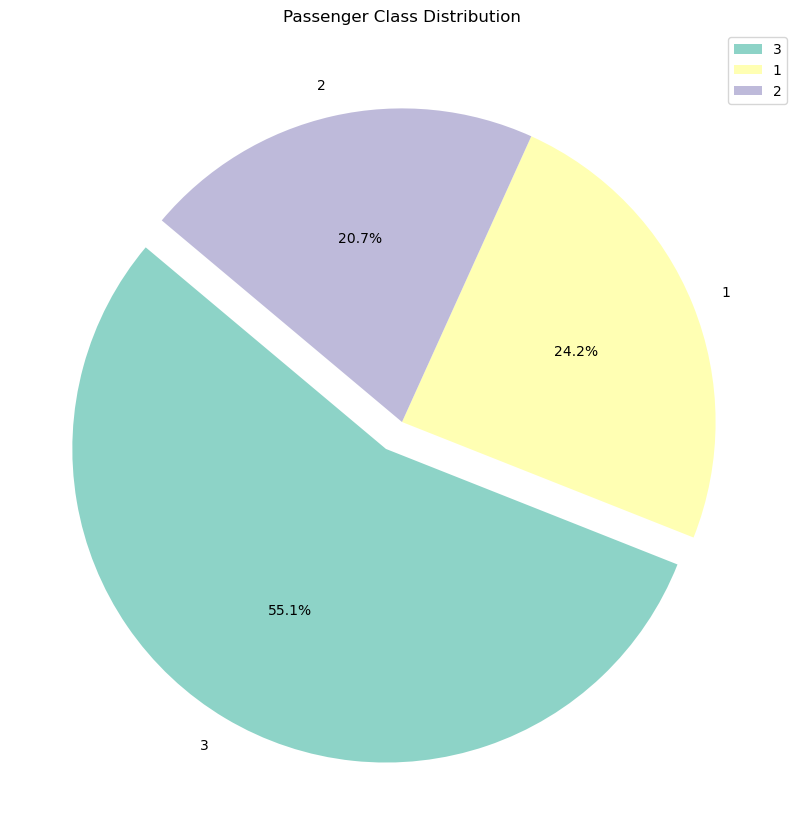

In [581]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Passenger Class Distribution')
plt.legend(labels=class_counts.index, loc='upper right')
plt.show()
